<a href="https://colab.research.google.com/github/antoinebachand/Derivatives-and-risk-management/blob/main/Hydrology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hydro Power Management - Hydrology 

*   Tungna
*   Dynkur
*   Vatnakvisl


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Import Data and create dataframe 
dfTun = pd.read_csv('Dynkur.csv')
dfDyn = pd.read_csv('Tungnaa.csv')
dfVat= pd.read_csv('Vatnakvisl.csv')

In [4]:
# See the Dataframes
dfTun.head()

Time       total  glacier_flow   baseflow  overland_flow
0  01-Oct-1958  208.146118    147.720413  44.138477      16.287230
1  02-Oct-1958  148.052597     98.415421  44.108871       5.528310
2  03-Oct-1958  113.484680     65.486015  44.079494       3.919169
3  04-Oct-1958   93.491318     40.209091  44.048676       9.233547
4  05-Oct-1958   82.439636     31.118109  44.017574       7.303957

In [5]:
dfDyn.head()


Time       total  glacier_flow    baseflow  overland_flow
0  01-Oct-1958  258.890167    116.905952   99.285240      42.698959
1  02-Oct-1958  230.755951    115.225929  100.004486      15.525534
2  03-Oct-1958  191.009247     80.887535  100.311798       9.809921
3  04-Oct-1958  167.139420     55.201466  100.418594      11.519356
4  05-Oct-1958  162.822968     44.761990  100.439514      17.621469

In [6]:
dfVat.head()

Time      total  glacier_flow  baseflow  overland_flow
0  01-Oct-1958  51.331966     47.427525  3.752858       0.151583
1  02-Oct-1958  31.654716     27.789566  3.754298       0.110853
2  03-Oct-1958  24.783110     20.267277  3.754845       0.760987
3  04-Oct-1958  17.610512     13.234472  3.754903       0.621137
4  05-Oct-1958  16.745745     12.386570  3.754984       0.604192

In [30]:
# Long term mean
Mean_vector_Tun = [dfTun['total'].mean(), dfTun['glacier_flow'].mean(), dfTun['baseflow'].mean(), dfTun['overland_flow'].mean()]
Mean_vector_Dyn = [dfDyn['total'].mean(), dfDyn['glacier_flow'].mean(), dfDyn['baseflow'].mean(), dfDyn['overland_flow'].mean()]
Mean_vector_Vat = [dfVat['total'].mean(), dfVat['glacier_flow'].mean(), dfVat['baseflow'].mean(), dfVat['overland_flow'].mean()]

# Create the mean table 
rows = ["Tungnaa", "Dynkur", "Vatnakvisl"]
columns = ["Total Mean", "Glacier Flow Mean", "Base flow Mean", "Overland flow Mean"]
data = np.array([Mean_vector_Tun, Mean_vector_Dyn, Mean_vector_Vat])
df_mean = pd.DataFrame(data=data, index=rows, columns=columns)

print("The long term mean table is the following:"), print("")
print(df_mean)

[127.19642569912966, 32.30573197415184, 53.4542595397118, 41.43643421284778]
The long term mean table is the following:

            Total Mean  Glacier Flow Mean  Base flow Mean  Overland flow Mean
Tungnaa     127.196426          32.305732       53.454260           41.436434
Dynkur      177.820217          29.753320      114.030758           34.036139
Vatnakvisl   19.323744          14.106558        3.985109            1.232077


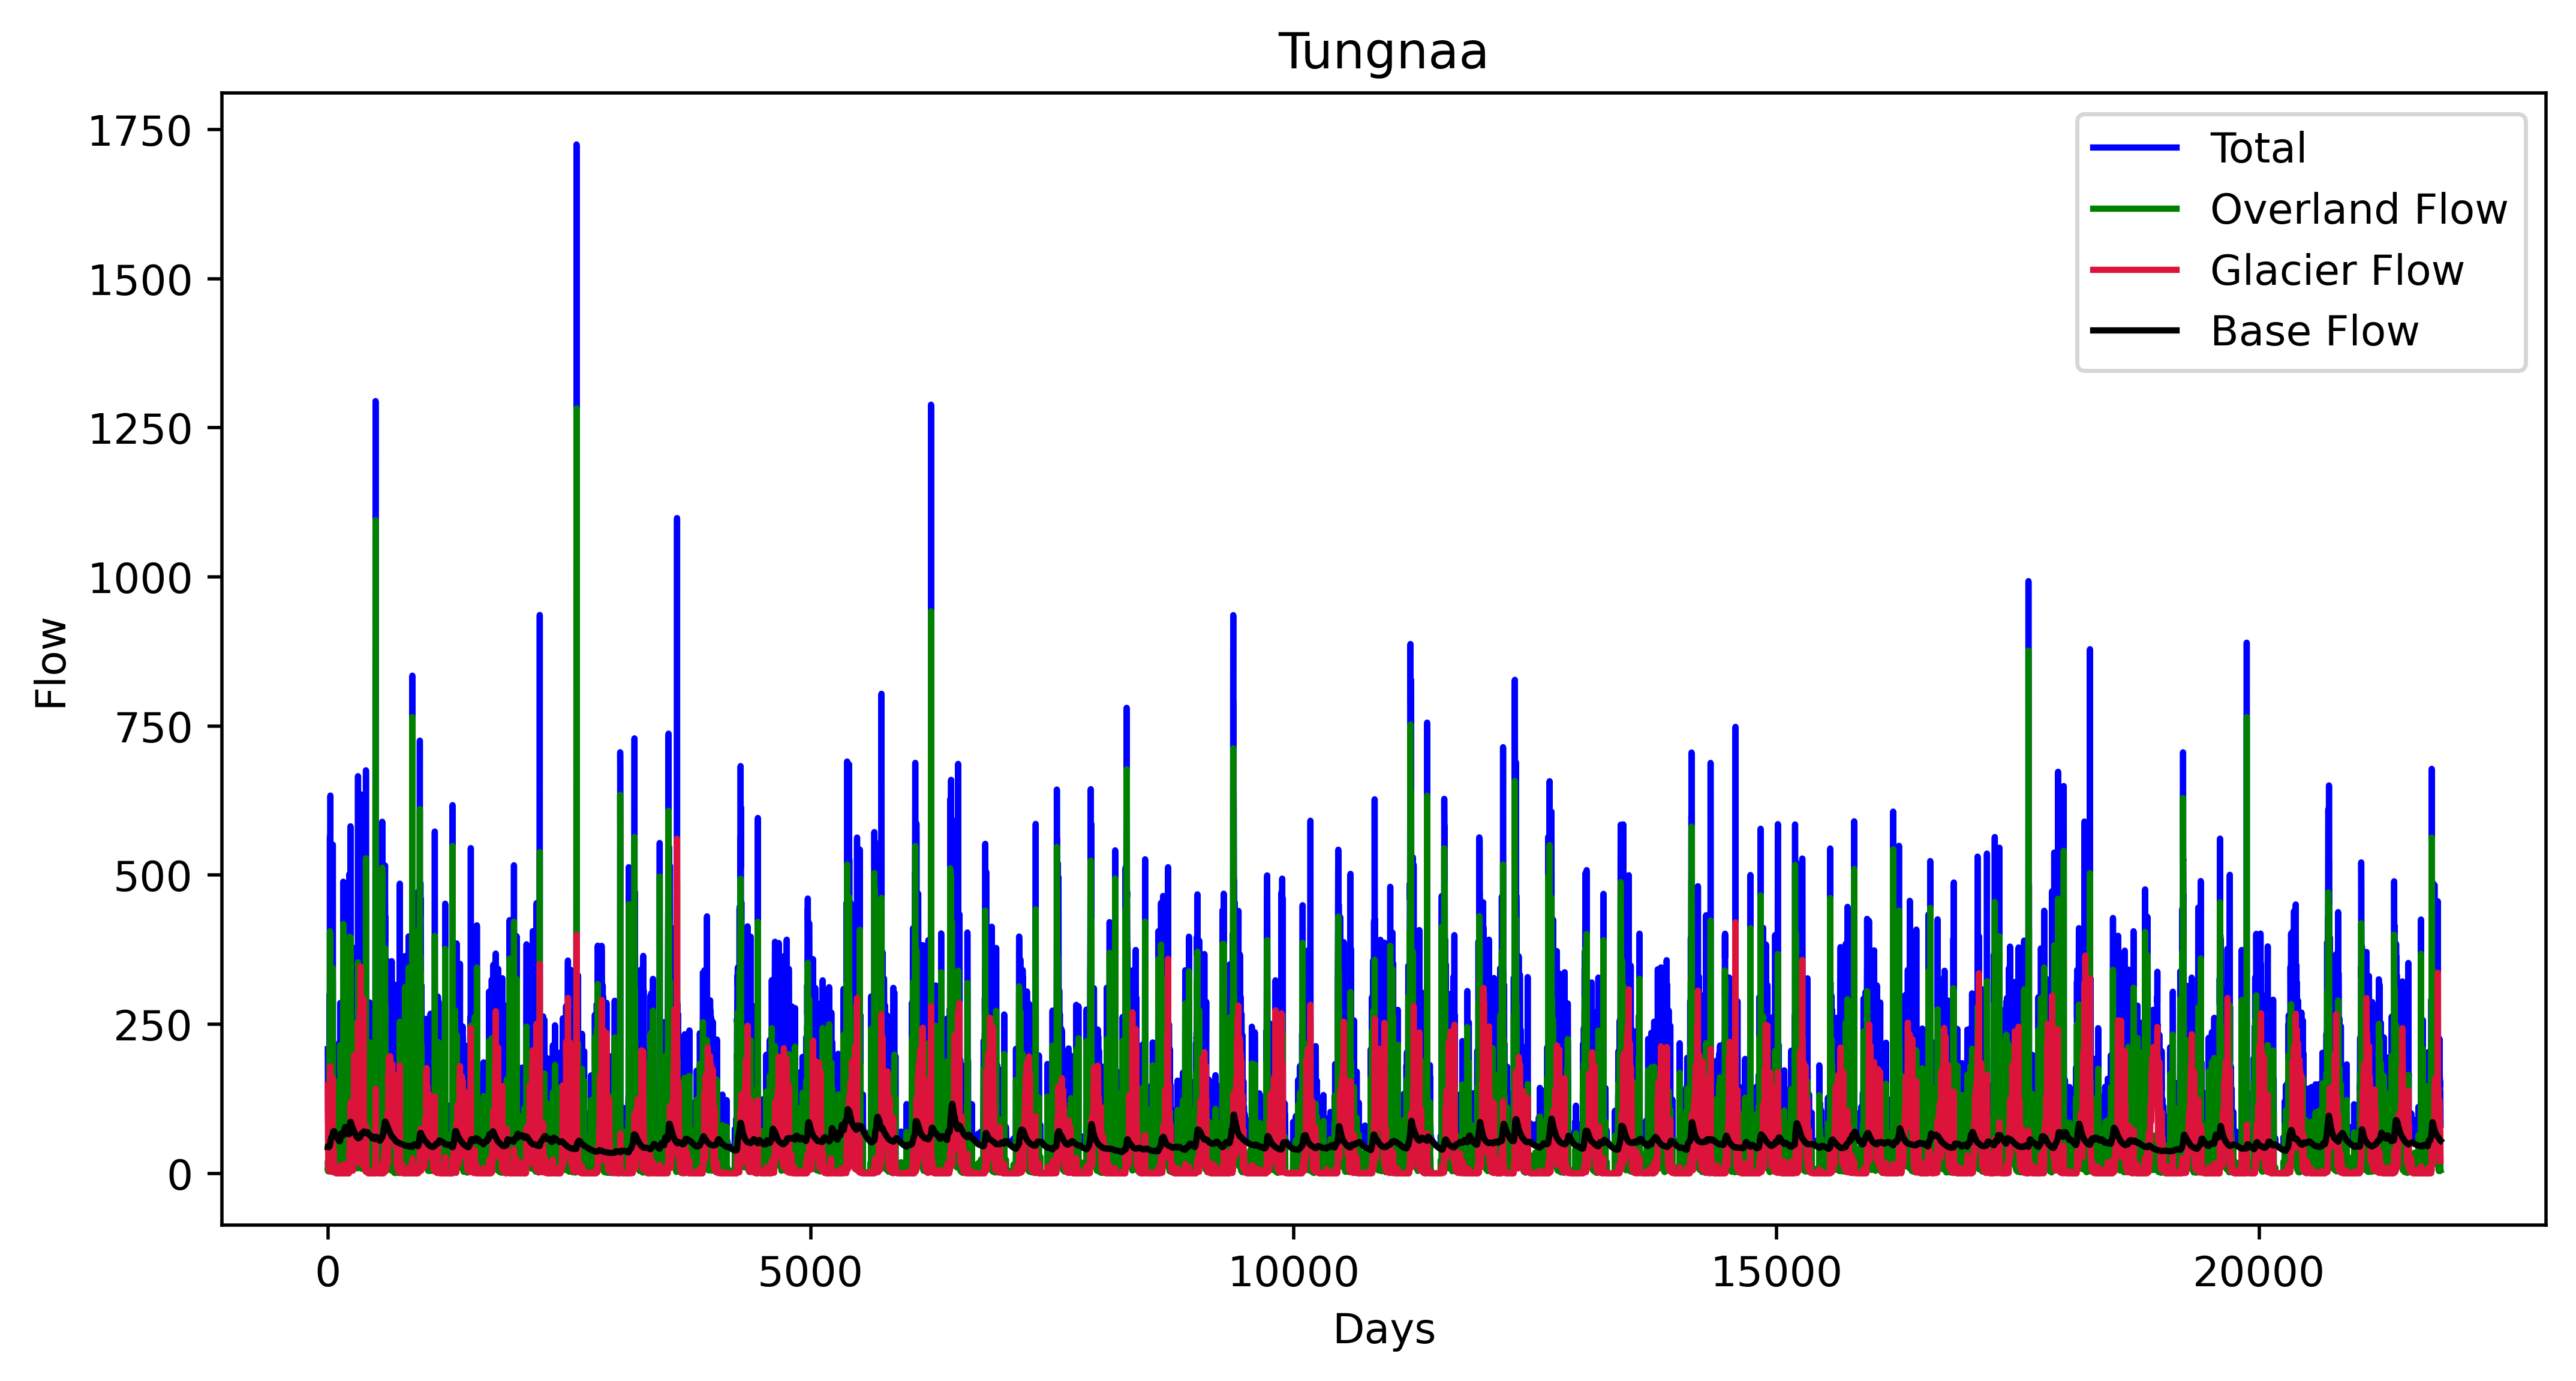

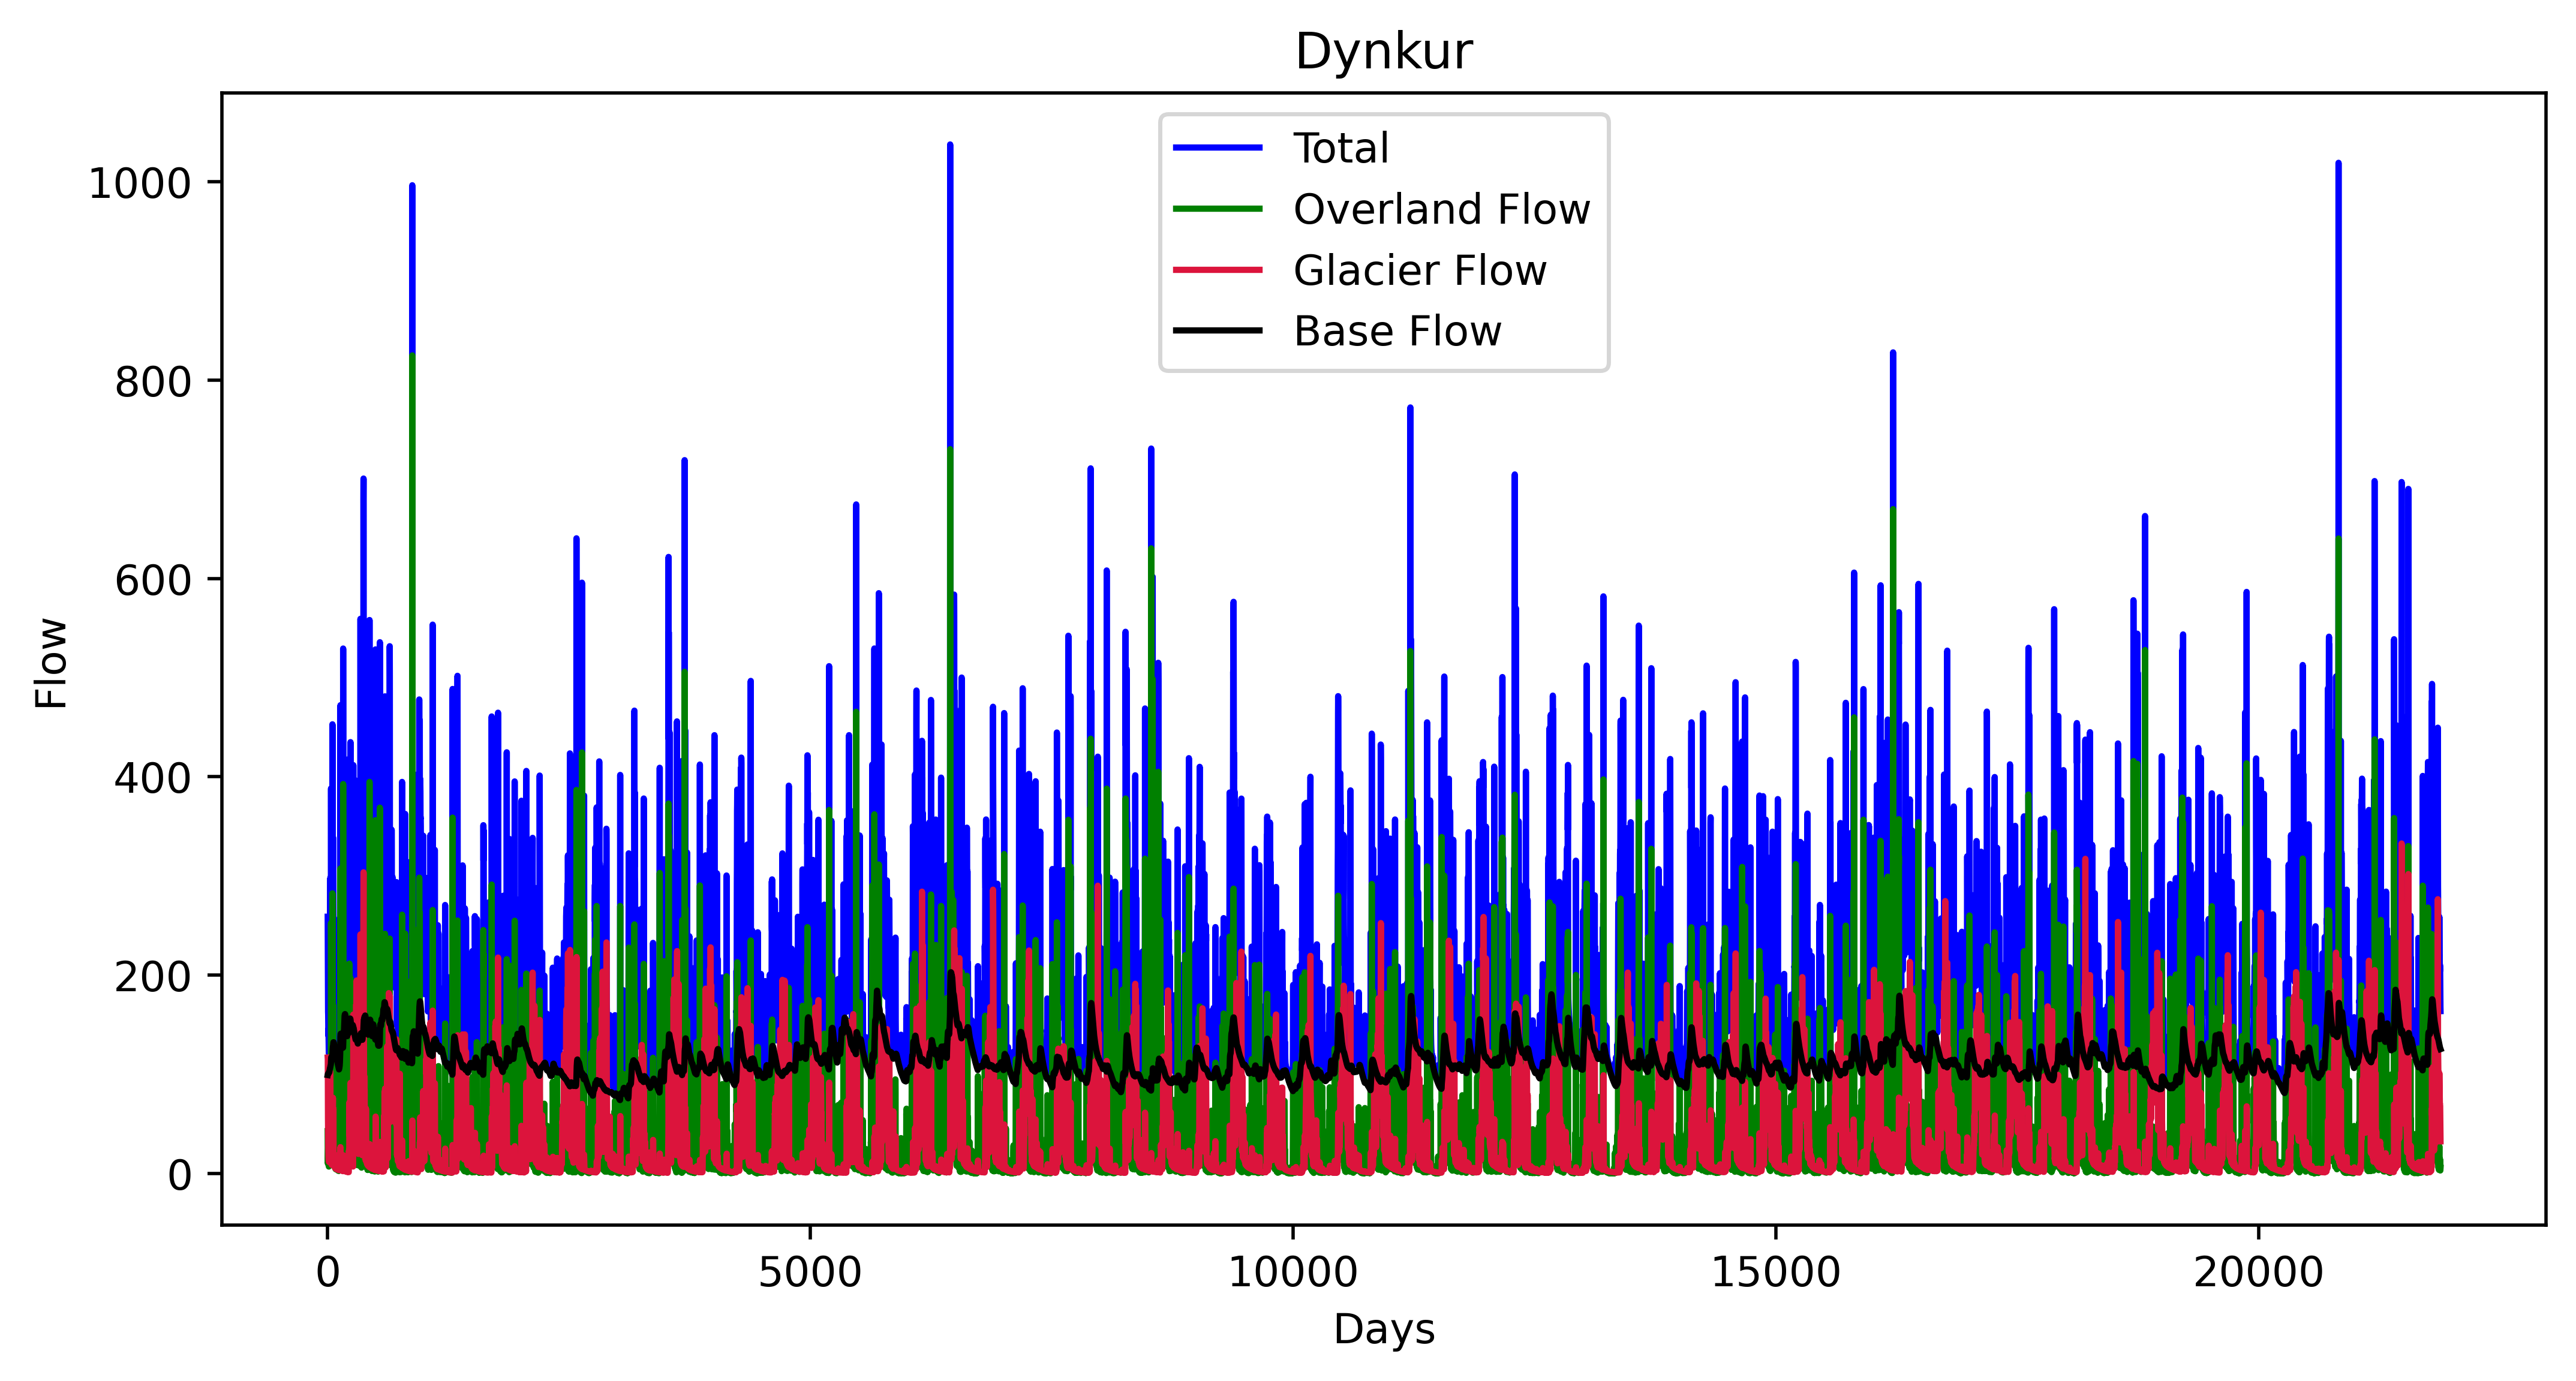

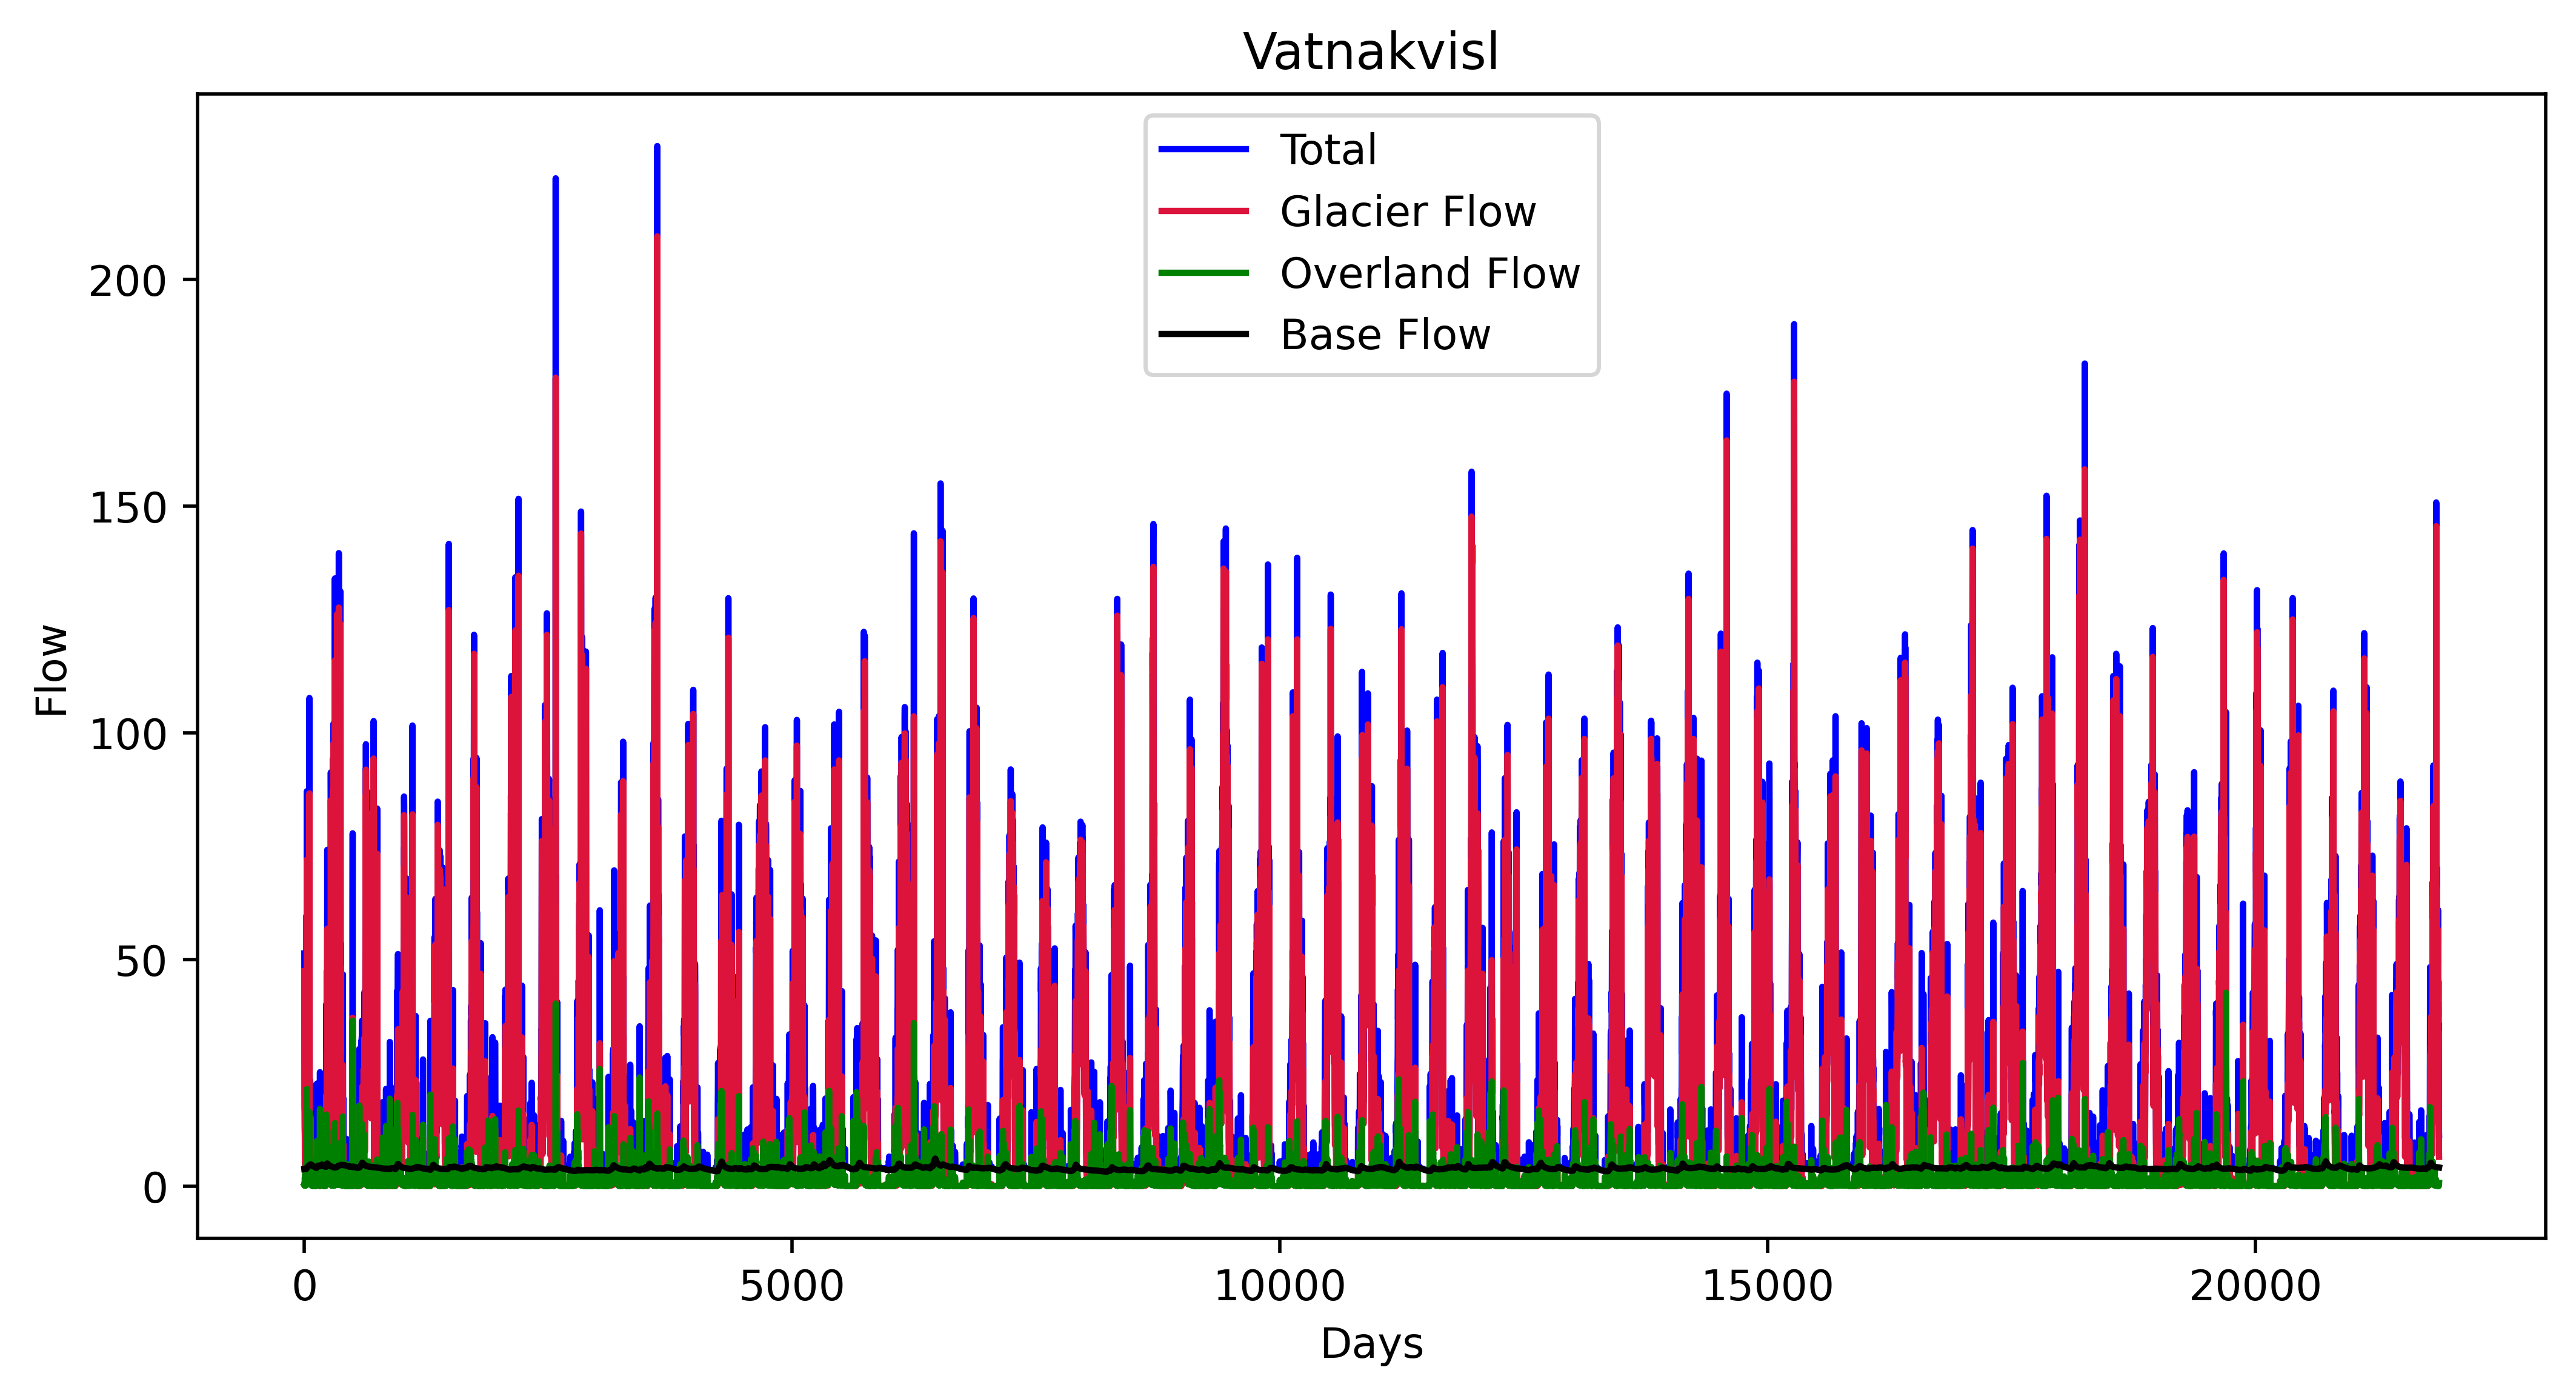

In [8]:
# Plot the discharge and distribution
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(dfTun['total'], 'b', label= 'Total')
ax.plot(dfTun['overland_flow'], 'g', label= 'Overland Flow')
ax.plot(dfTun['glacier_flow'], 'crimson', label= 'Glacier Flow')
ax.plot(dfTun['baseflow'], 'k', label= 'Base Flow')

ax.set_xlabel('Days')
ax.set_ylabel('Flow')
ax.set_title('Tungnaa')
ax.legend()
plt.show() 

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(dfDyn['total'], 'b', label= 'Total')
ax.plot(dfDyn['overland_flow'], 'g', label= 'Overland Flow')
ax.plot(dfDyn['glacier_flow'], 'crimson', label= 'Glacier Flow')
ax.plot(dfDyn['baseflow'], 'k', label= 'Base Flow')
ax.set_xlabel('Days')
ax.set_ylabel('Flow')
ax.set_title('Dynkur')
ax.legend()
plt.show() 

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(dfVat['total'], 'b', label= 'Total')
ax.plot(dfVat['glacier_flow'], 'crimson', label= 'Glacier Flow')
ax.plot(dfVat['overland_flow'], 'g', label= 'Overland Flow')
ax.plot(dfVat['baseflow'], 'k', label= 'Base Flow')
ax.set_xlabel('Days')
ax.set_ylabel('Flow')
ax.set_title('Vatnakvisl')
ax.legend()
plt.show()

# Type of daily flow
# This last section illustrated the relationship between the origin of the flow, i.e. base flow, overland flow and glacial flow.  We can notice that the Vatnakvisl flow is mainly related to the glacial flow. In contrast, the Dynkur main hydrological component is the base flow and the Tungnaa main hydrological component is the overland flow. Finaly, there are short dry periods but they are mainly related to the season like winter for example. 

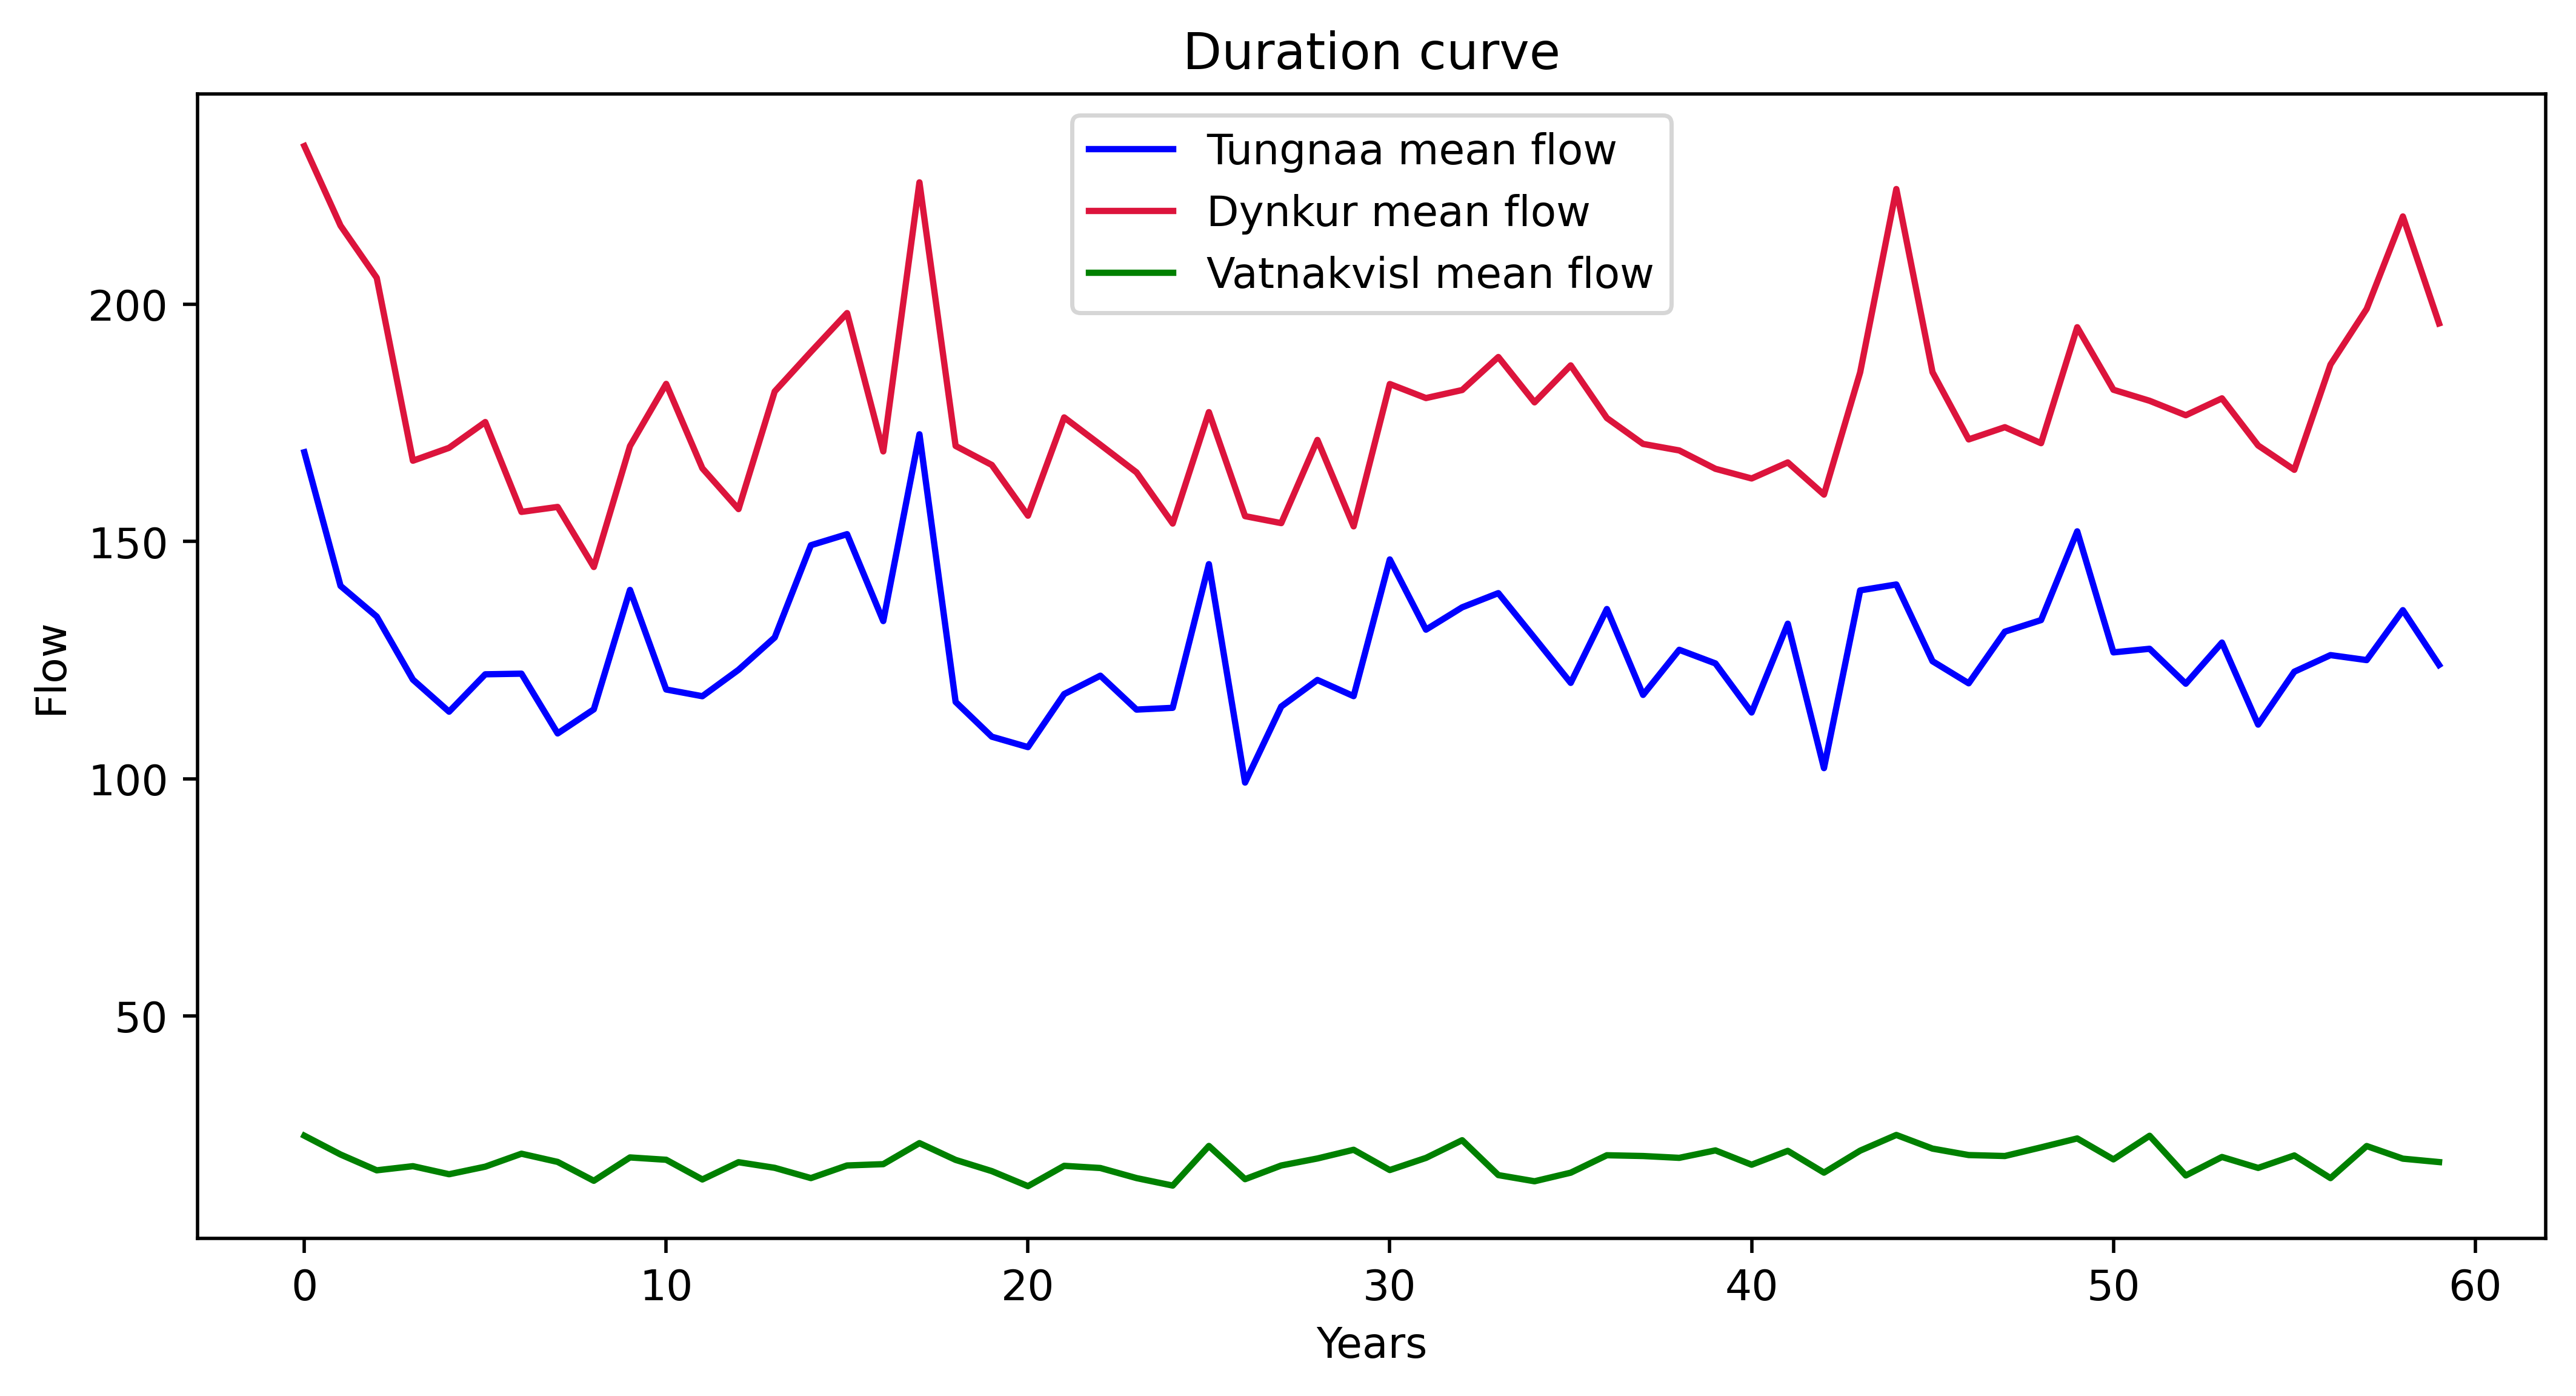

In [9]:
# Create the yearly mean
from skimage.measure import block_reduce

dfTun_y = dfTun.iloc[41:]
dfDyn_y = dfDyn.iloc[41:]
dfVat_y = dfVat.iloc[41:]

Tun = np.array(dfTun_y['total'])
Dyn = np.array(dfDyn_y['total'])
Vat = np.array(dfVat_y['total'])

# calculates the Yearly average
n = 364
Tun_y = Tun.reshape(-1, n).mean(axis=1)
Dyn_y = Dyn.reshape(-1, n).mean(axis=1)
Vat_y = Vat.reshape(-1, n).mean(axis=1)

# Plot the duration curve 
fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Tun_y, 'b', label= 'Tungnaa mean flow')
ax.plot(Dyn_y, 'crimson', label= 'Dynkur mean flow')
ax.plot(Vat_y, 'g', label= 'Vatnakvisl mean flow')
ax.set_xlabel('Years')
ax.set_ylabel('Flow')
ax.set_title('Duration curve')
ax.legend()
plt.show()


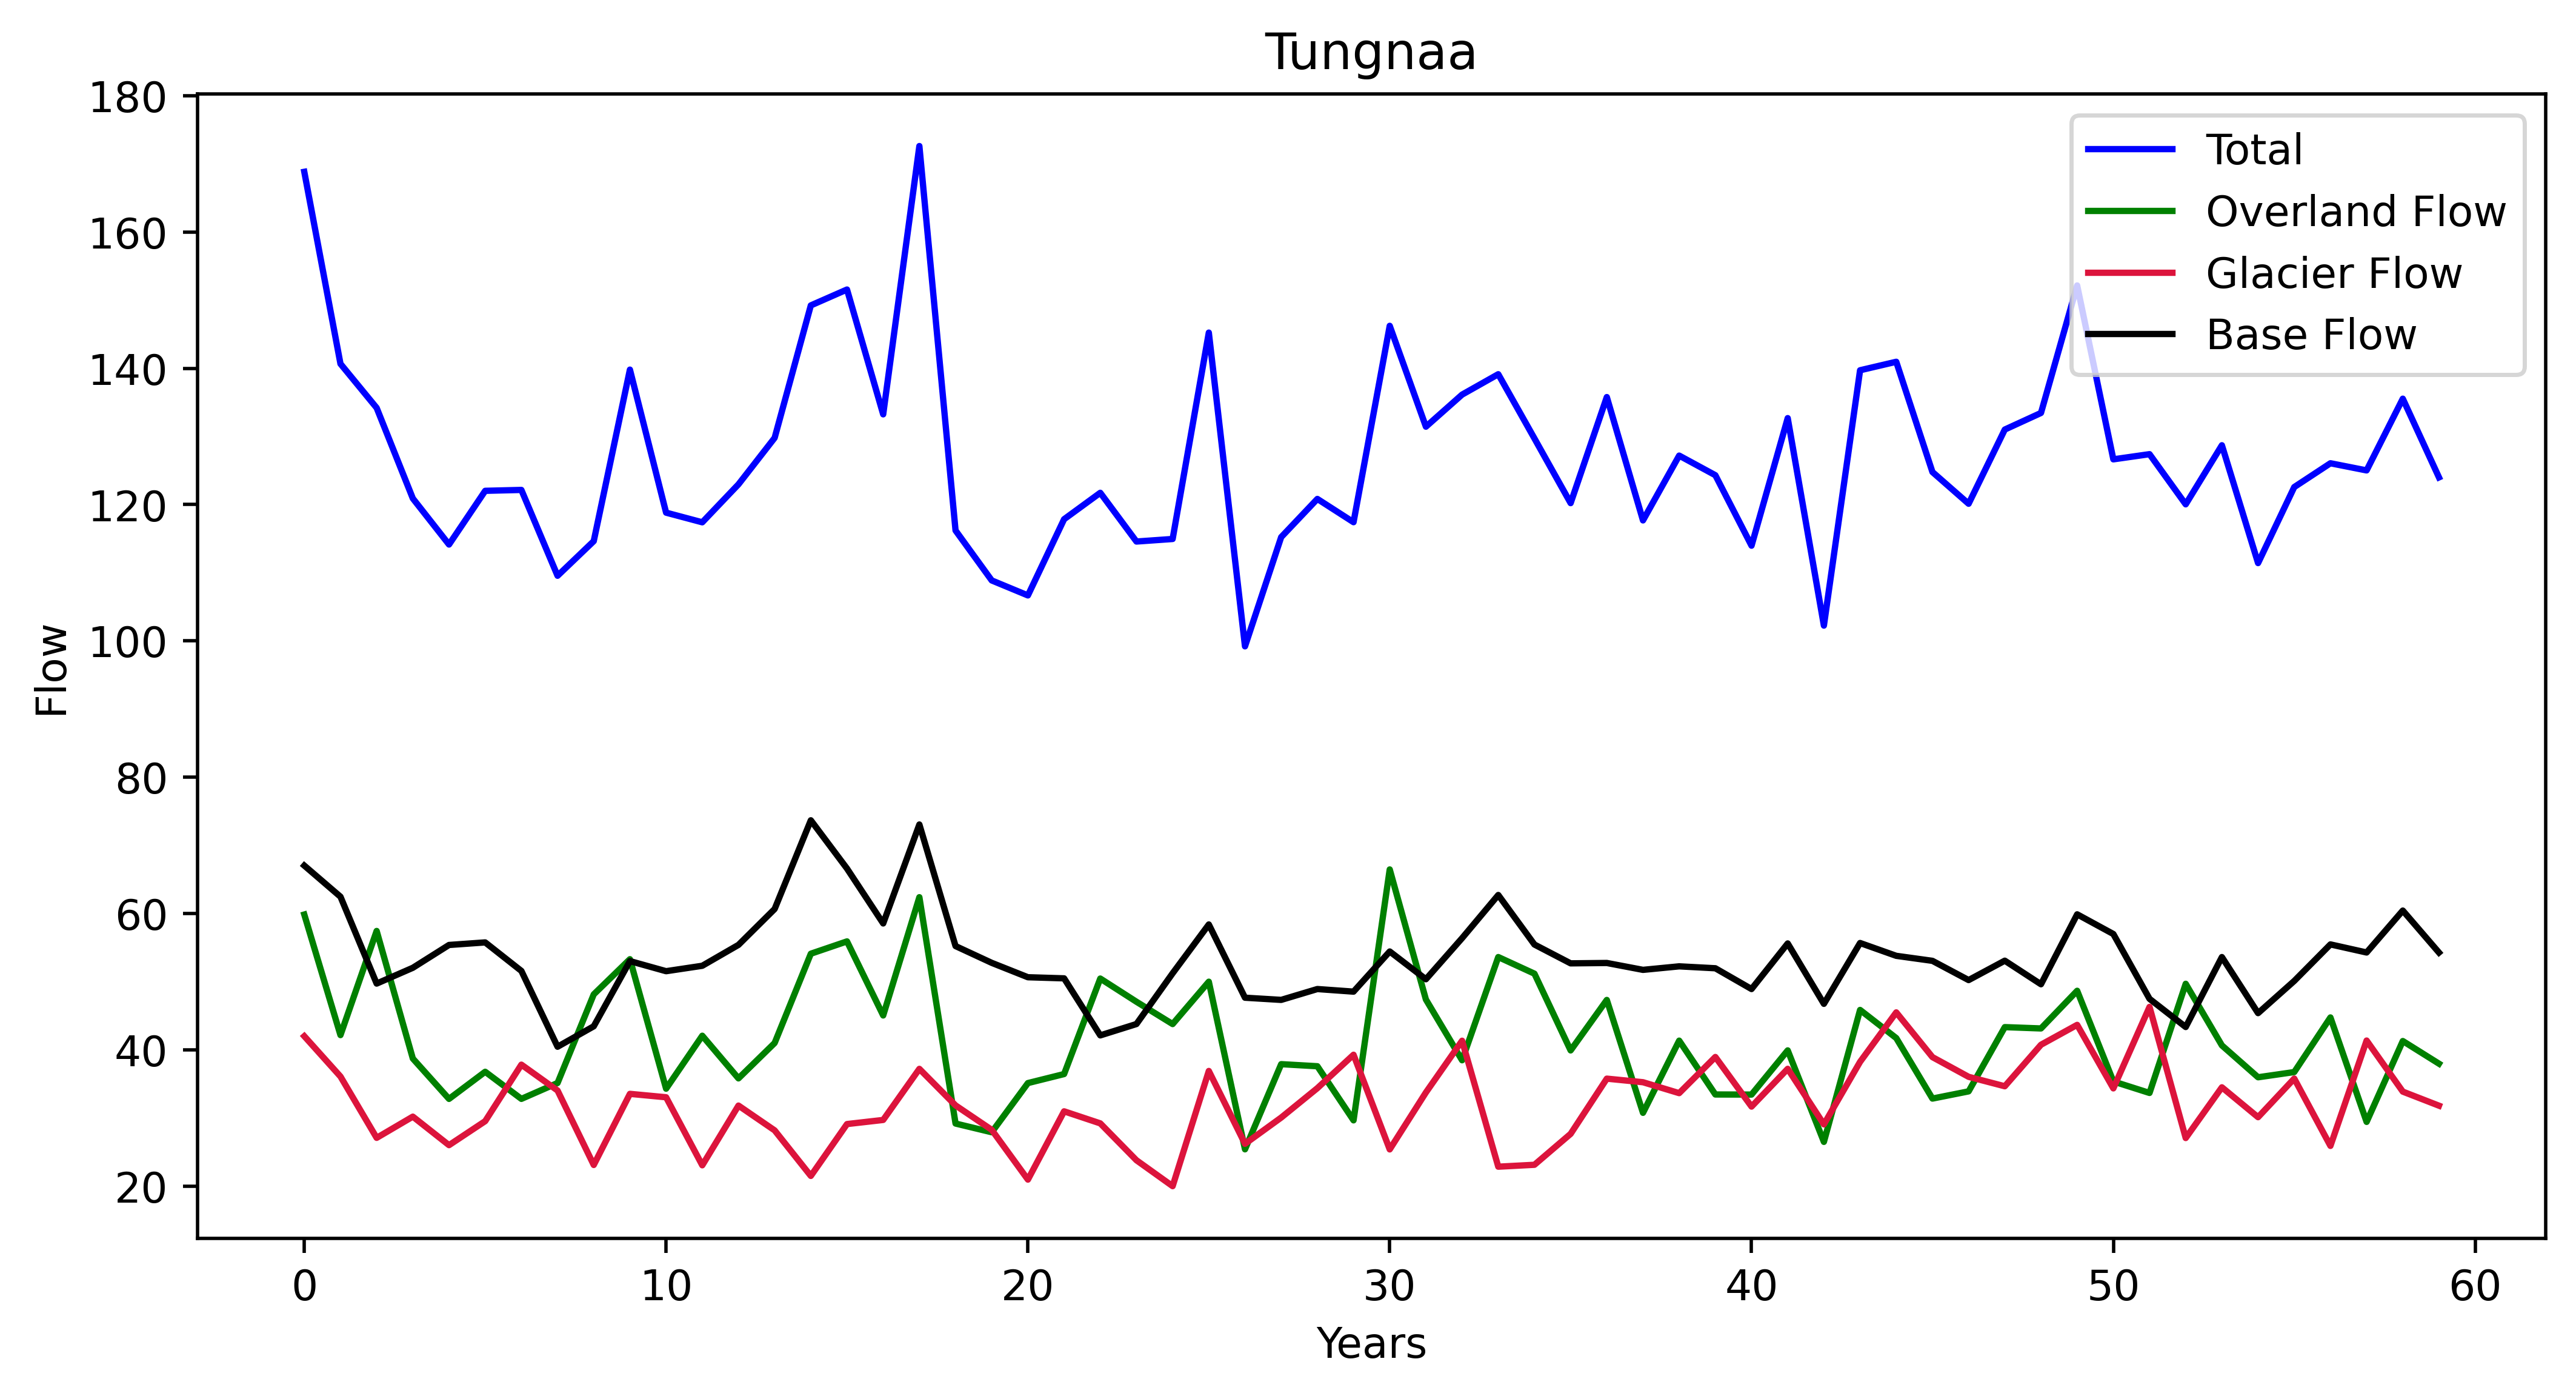

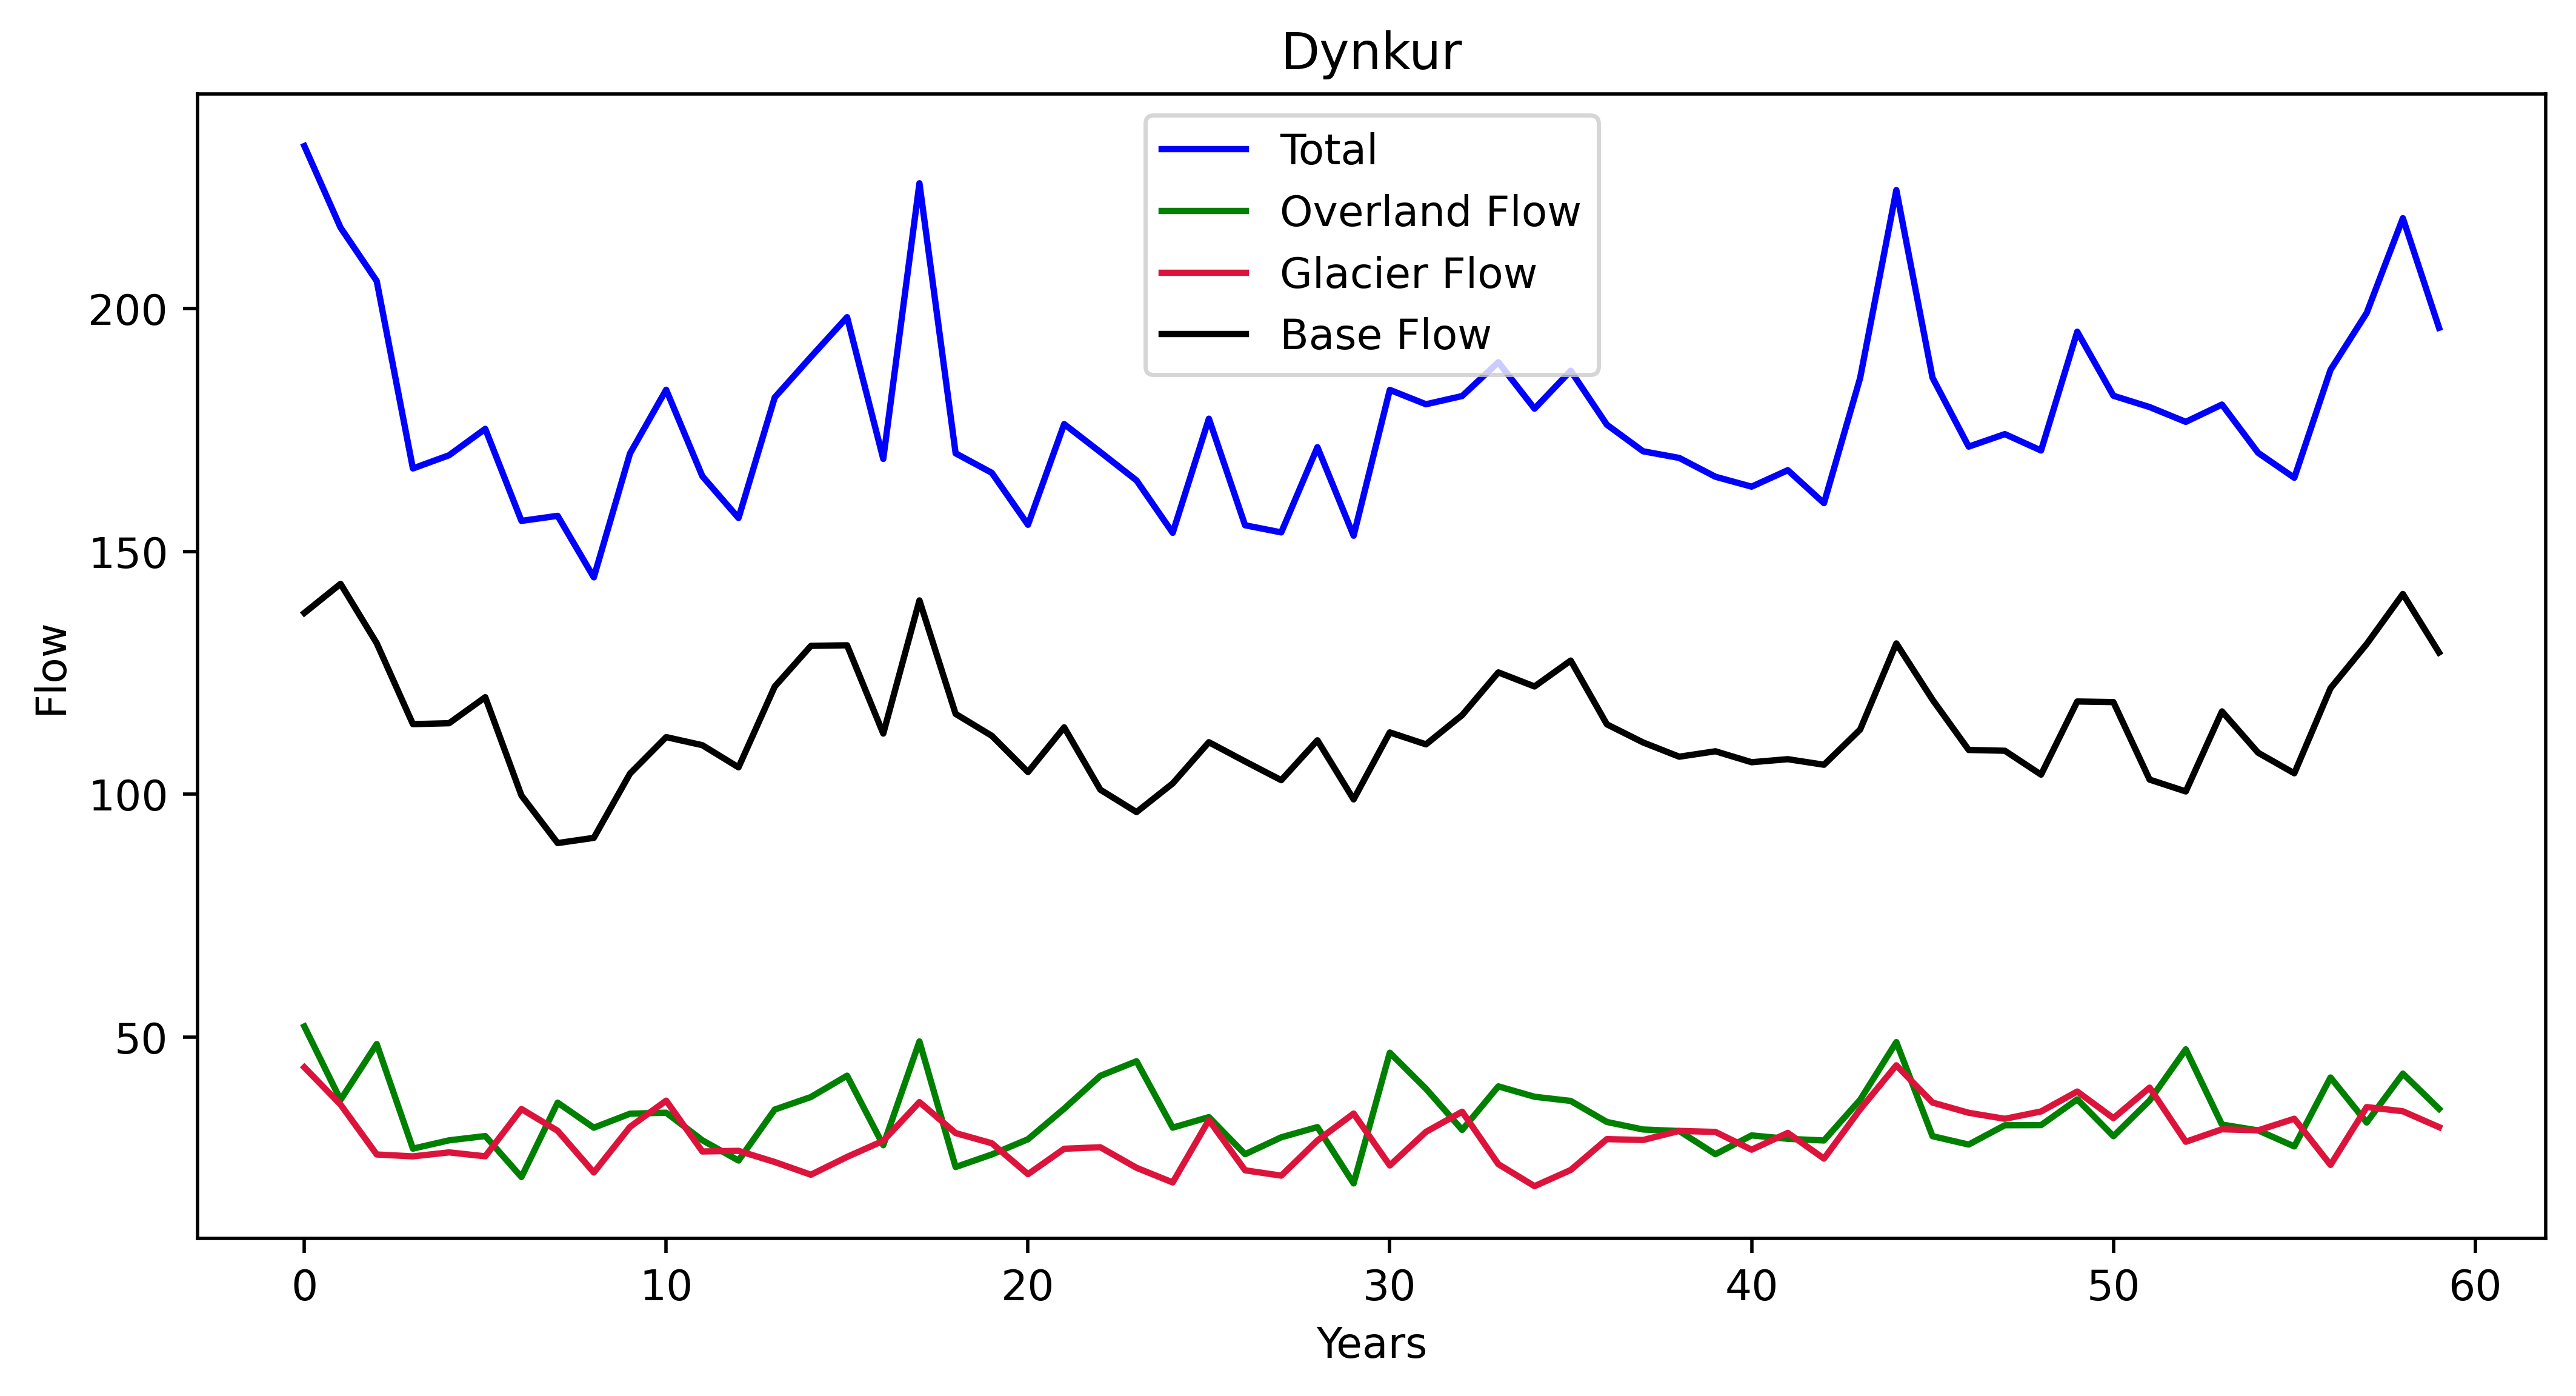

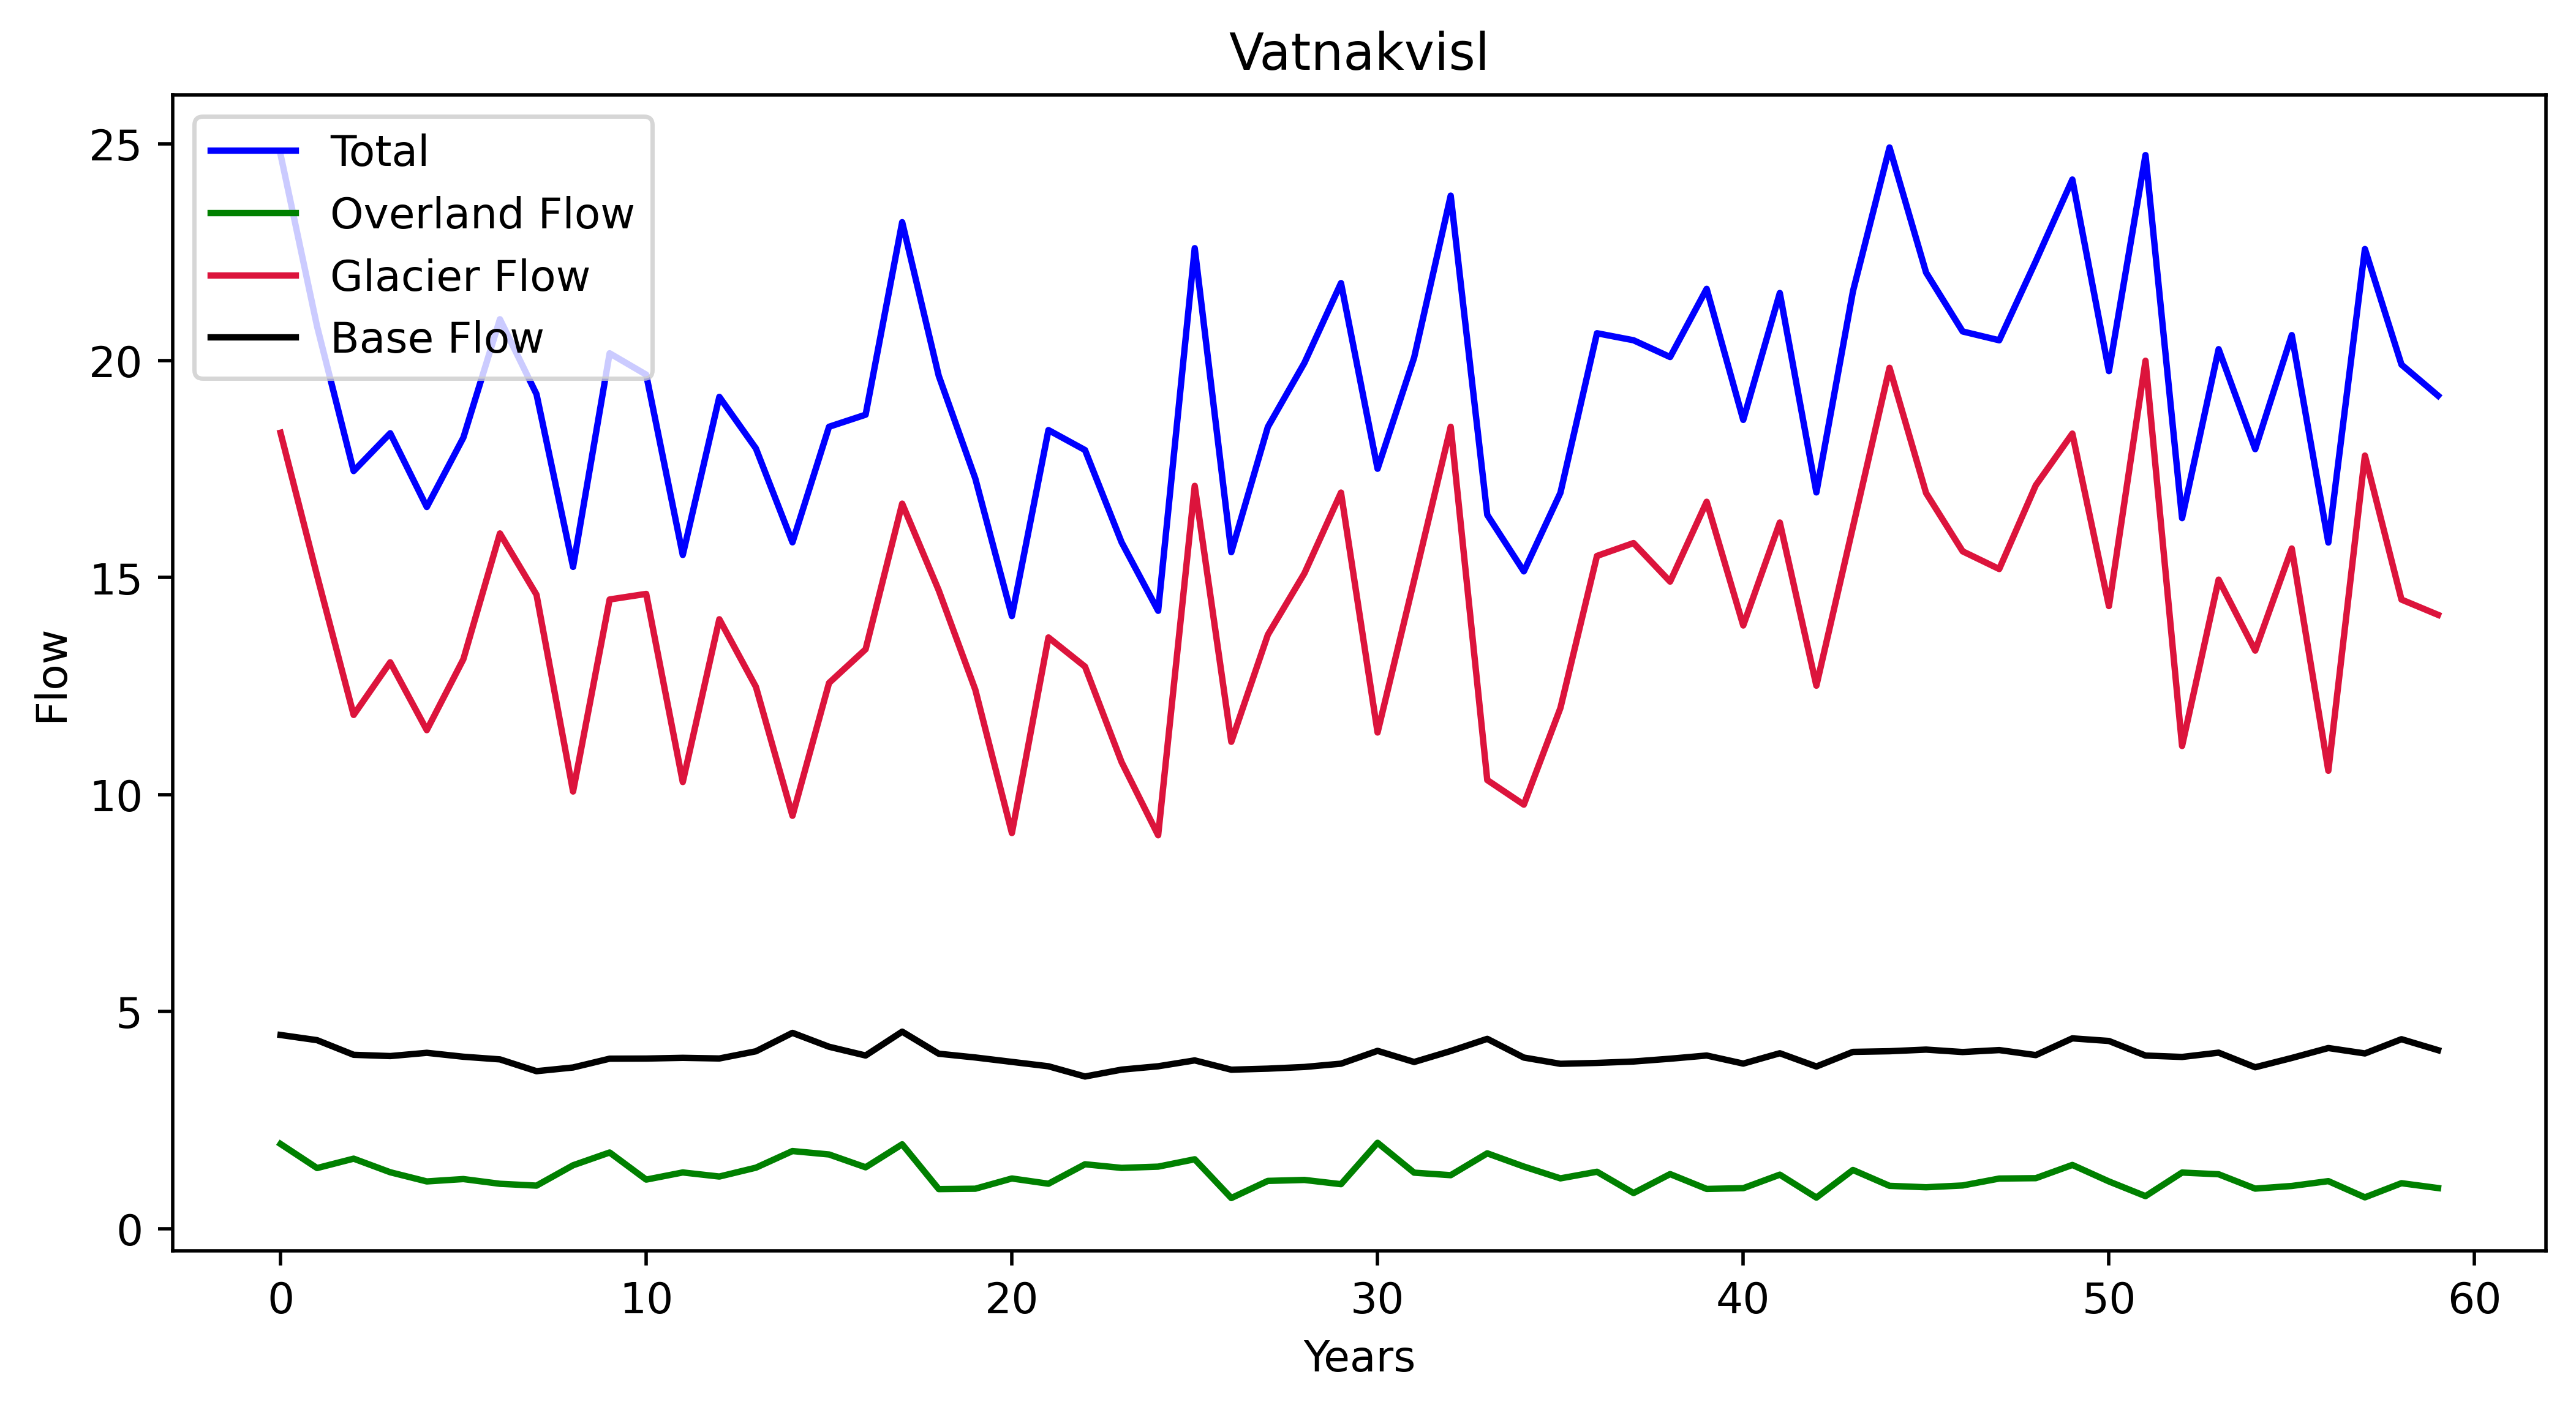

In [10]:

# Create the yearly flow graphs
Tun_Ov = np.array(dfTun_y['overland_flow'])
Tun_Gl = np.array(dfTun_y['glacier_flow'])
Tun_Ba = np.array(dfTun_y['baseflow'])

Dyn_Ov = np.array(dfDyn_y['overland_flow'])
Dyn_Gl =  np.array(dfDyn_y['glacier_flow'])
Dyn_Ba = np.array(dfDyn_y['baseflow'])

Vat_Ov = np.array(dfVat_y['overland_flow'])
Vat_Gl = np.array(dfVat_y['glacier_flow'])
Vat_Ba = np.array(dfVat_y['baseflow'])

# calculates the Yearly average
n = 364
Tun_Ov_y = Tun_Ov.reshape(-1, n).mean(axis=1)
Tun_Gl_y = Tun_Gl.reshape(-1, n).mean(axis=1)
Tun_Ba_y = Tun_Ba.reshape(-1, n).mean(axis=1)

Dyn_Ov_y = Dyn_Ov.reshape(-1, n).mean(axis=1)
Dyn_Gl_y = Dyn_Gl.reshape(-1, n).mean(axis=1)
Dyn_Ba_y = Dyn_Ba.reshape(-1, n).mean(axis=1)

Vat_Ov_y = Vat_Ov.reshape(-1, n).mean(axis=1)
Vat_Gl_y = Vat_Gl.reshape(-1, n).mean(axis=1)
Vat_Ba_y = Vat_Ba.reshape(-1, n).mean(axis=1)

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Tun_y, 'b', label= 'Total')
ax.plot(Tun_Ov_y, 'g', label= 'Overland Flow')
ax.plot(Tun_Gl_y, 'crimson', label= 'Glacier Flow')
ax.plot(Tun_Ba_y, 'k', label= 'Base Flow')
ax.set_xlabel('Years')
ax.set_ylabel('Flow')
ax.set_title('Tungnaa')
ax.legend()
plt.show()

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Dyn_y, 'b', label= 'Total')
ax.plot(Dyn_Ov_y, 'g', label= 'Overland Flow')
ax.plot(Dyn_Gl_y, 'crimson', label= 'Glacier Flow')
ax.plot(Dyn_Ba_y, 'k', label= 'Base Flow')
ax.set_xlabel('Years')
ax.set_ylabel('Flow')
ax.set_title('Dynkur')
ax.legend()
plt.show()

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Vat_y, 'b', label= 'Total')
ax.plot(Vat_Ov_y, 'g', label= 'Overland Flow')
ax.plot(Vat_Gl_y, 'crimson', label= 'Glacier Flow')
ax.plot(Vat_Ba_y, 'k', label= 'Base Flow')
ax.set_xlabel('Years')
ax.set_ylabel('Flow')
ax.set_title('Vatnakvisl')
ax.legend()
plt.show()

This last section where we observe the annual averages allows us to visualize the long term trend.  
b) 
The presence of trend does not apply to all power plants. The most important trend is present in the Tungnaa graph.  We notice that the overland and glacier flow is on a downward trend.  The decrease in flow can be attributed to climate change. Since climate change is causing the size of the ice caps to decrease exponentially. However, in the case of Vatnakvisl, the glacier flow, which is the main hydrological component, increases slightly each year. This can be explained by the fact that glacial melts are more important due to global warming. But of course, this effect can not be appreciated for a long time and we may soon see potential long drought periods.  


In [ ]:
# Normalisation of the Data 

# Yearly flow Data Frame of all power plant

rows = list(range(0, 60))

Columns = ["Tungnaa", "Dynkur", "Vatnakvisl"]
data = np.array([Tun_y, Dyn_y, Vat_y])
#df = pd.DataFrame(data=data, index = rows, columns=columns)
print(data)

'''
norm = MinMaxScaler().fit(df_drop) # In the example, Xtrain is the input for this; only fit it on the correct columns
nd_norm = norm.transform(df_drop)
df_norm = pd.DataFrame(nd_norm)
df_norm.columns = ['expert1', 'expert2', 'sentiment', 'm1','m2', 'm3', 'm4', 'company0', 'company1', 'company2', 'segment', 'trend', 'stock-price', 'price increase']
'''



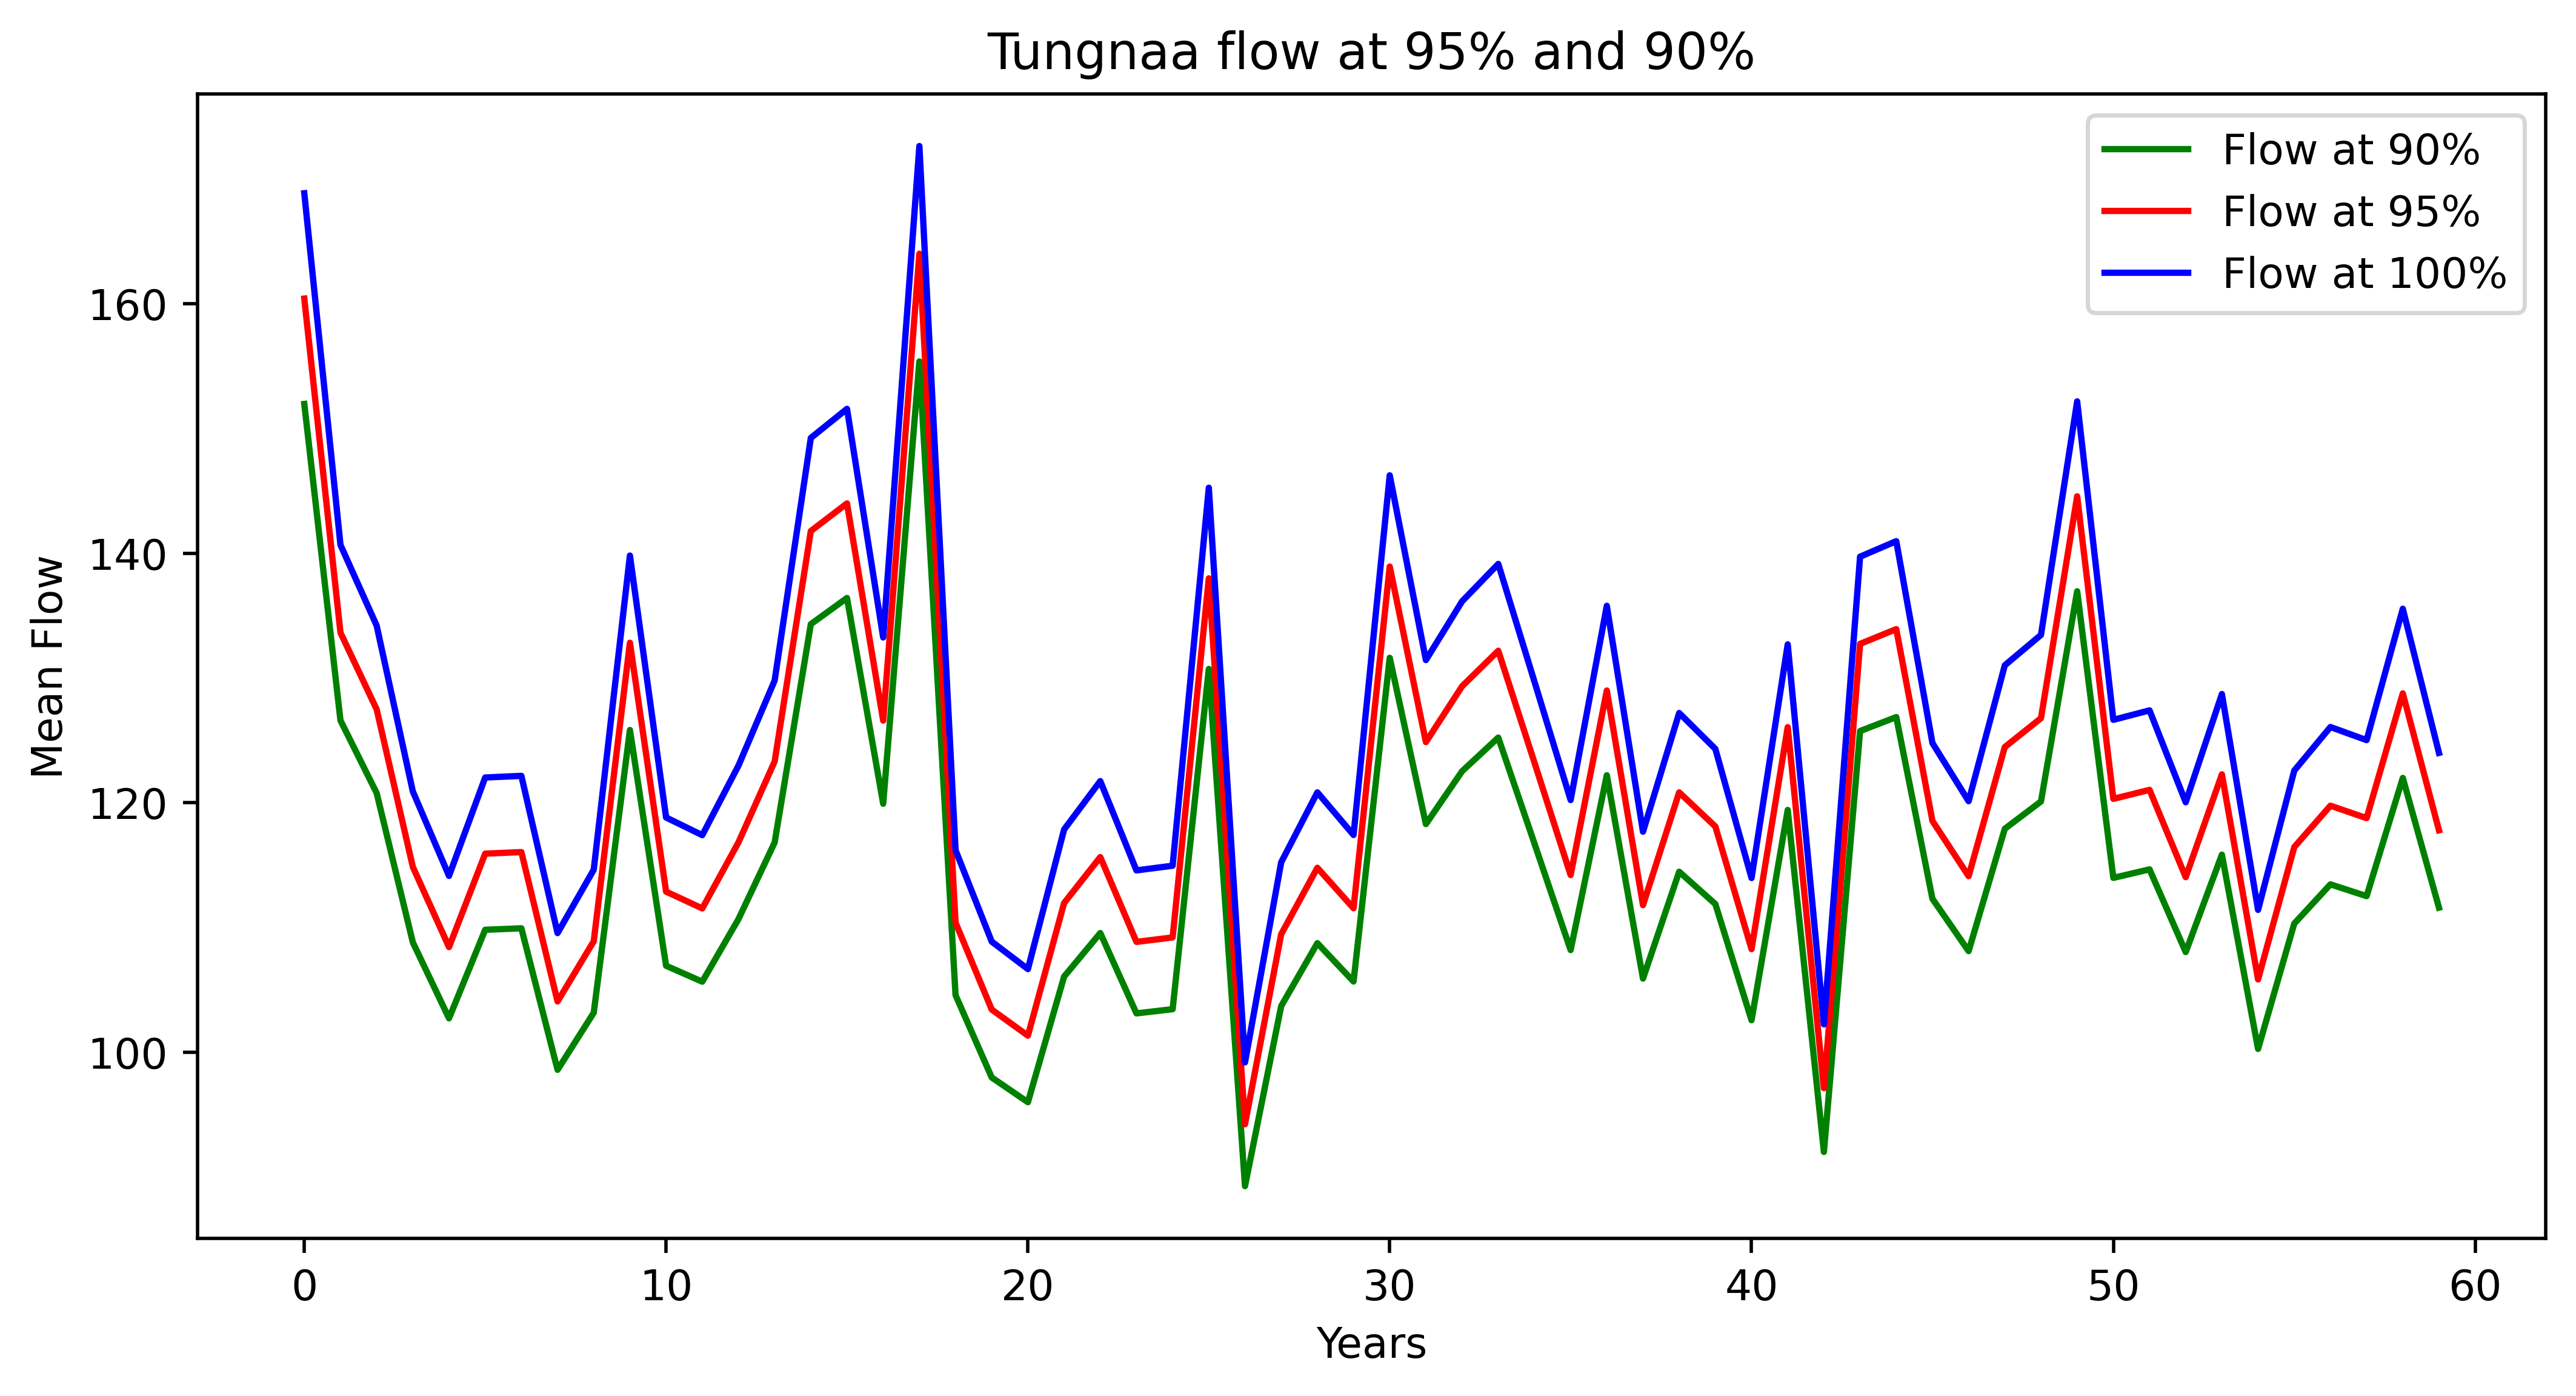

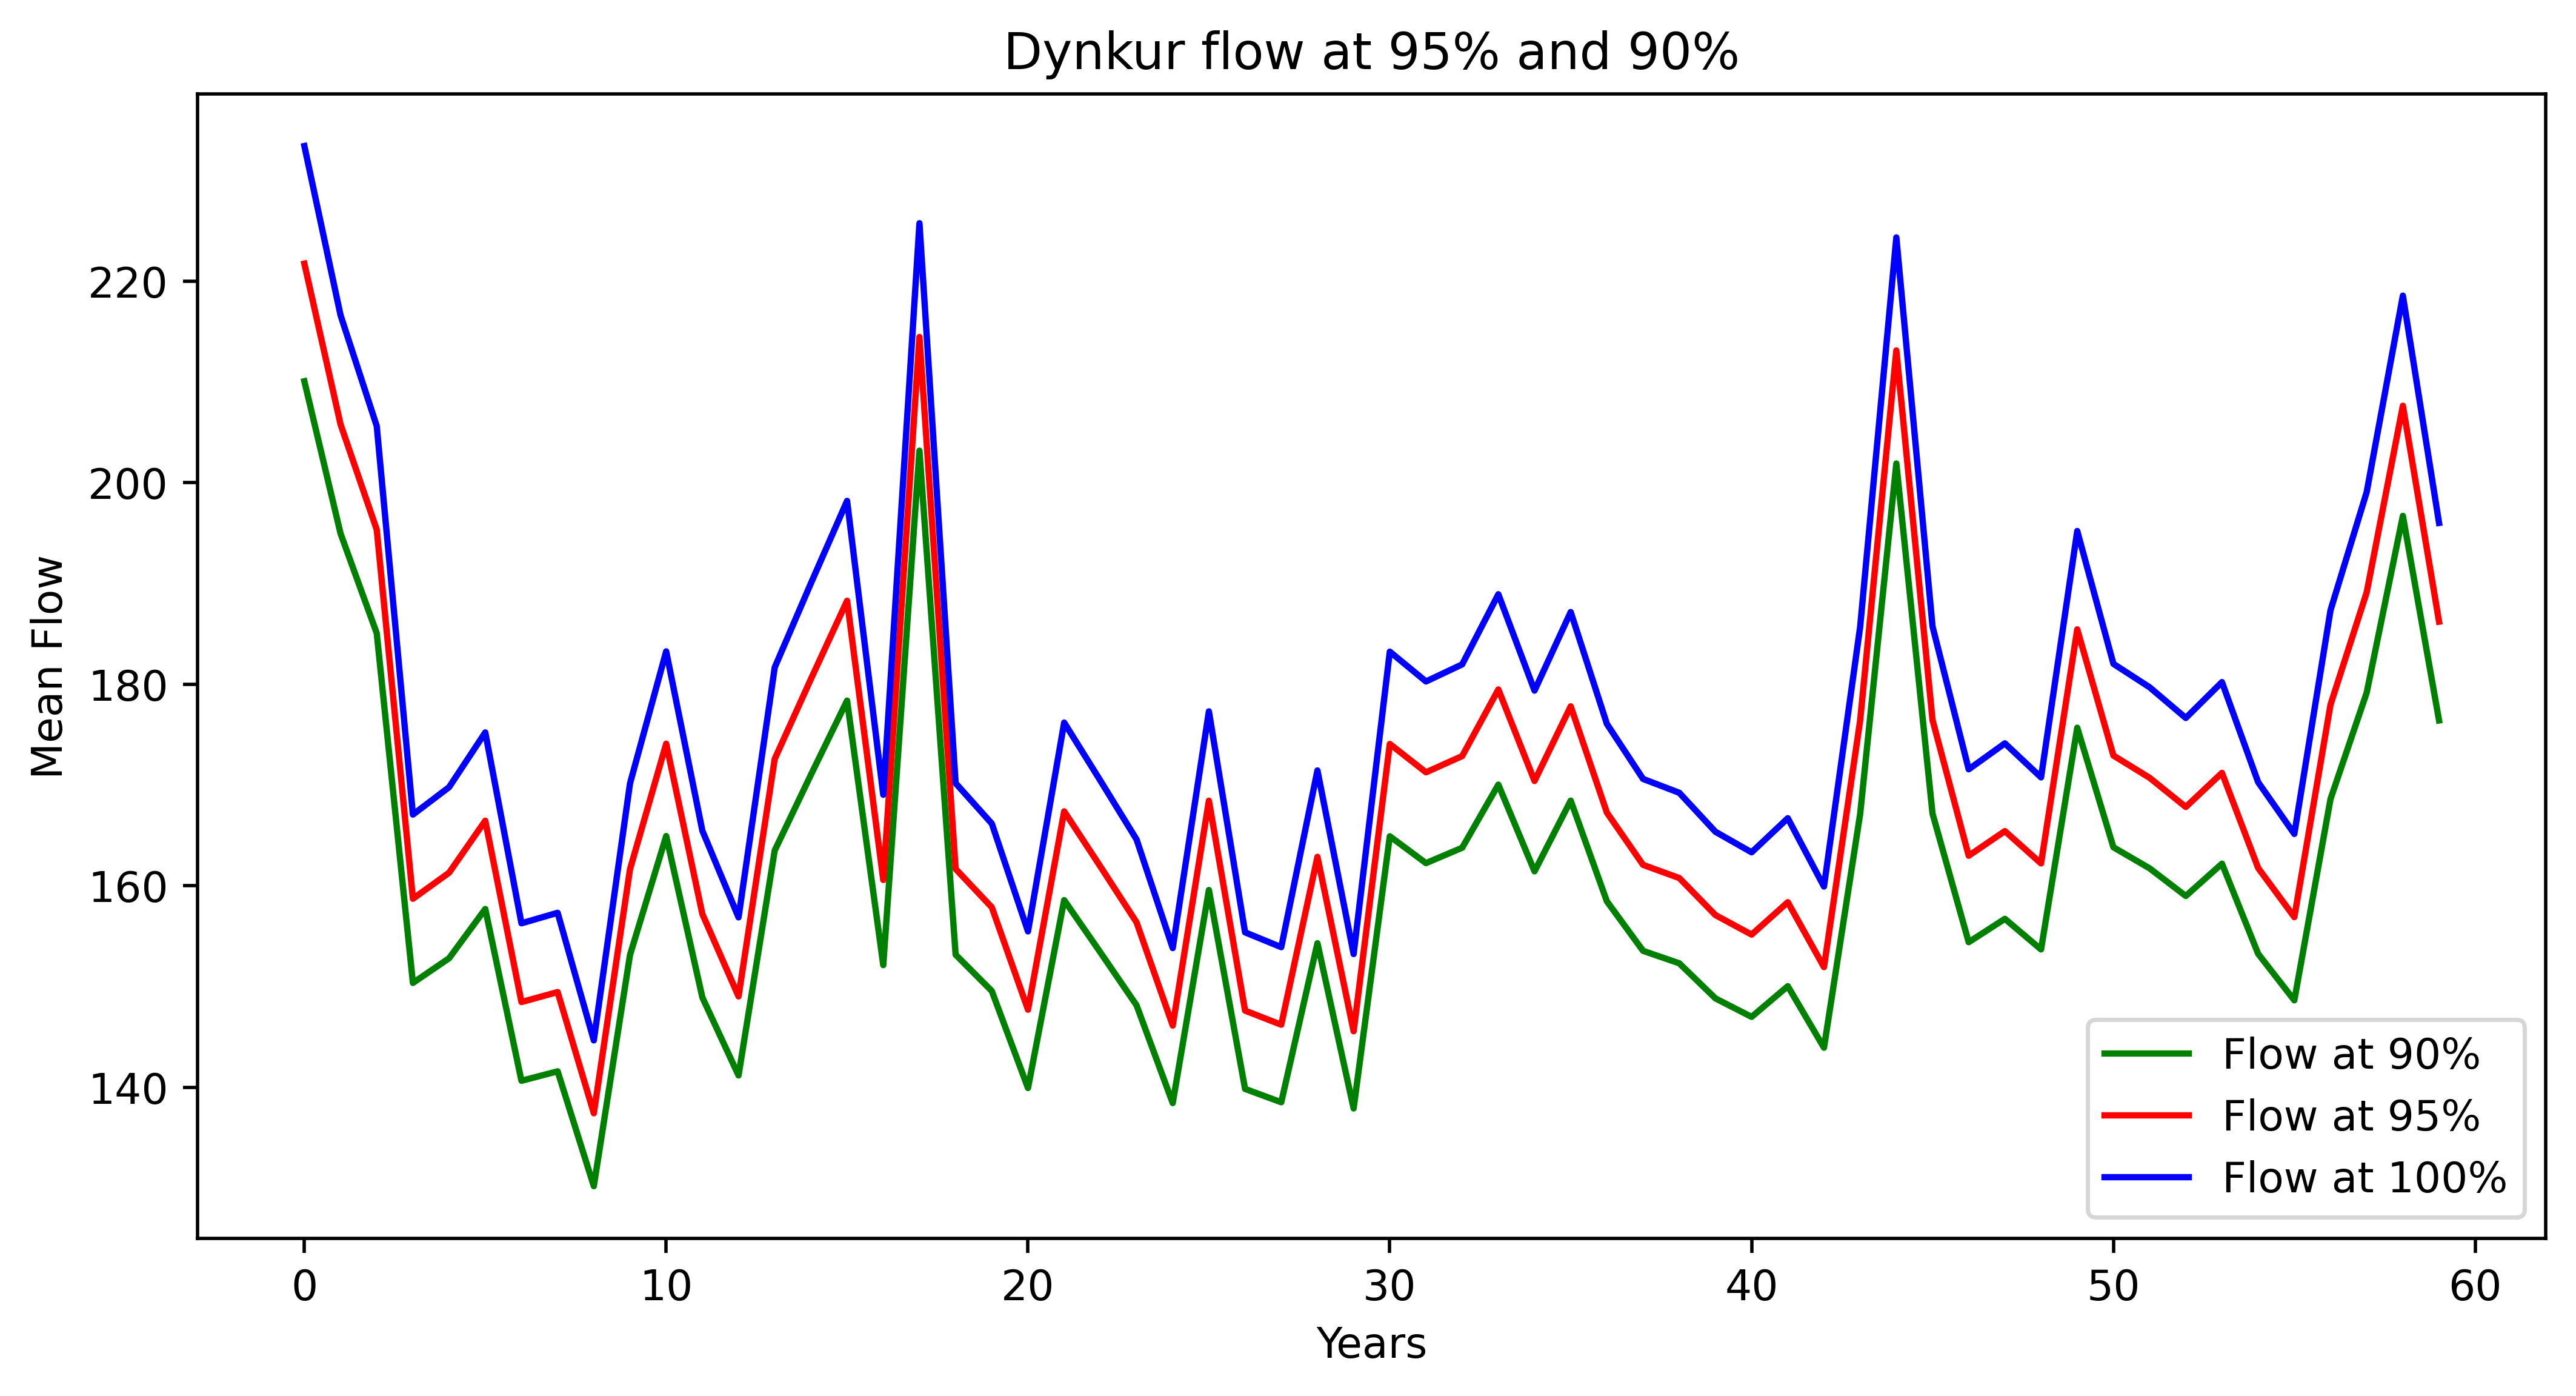

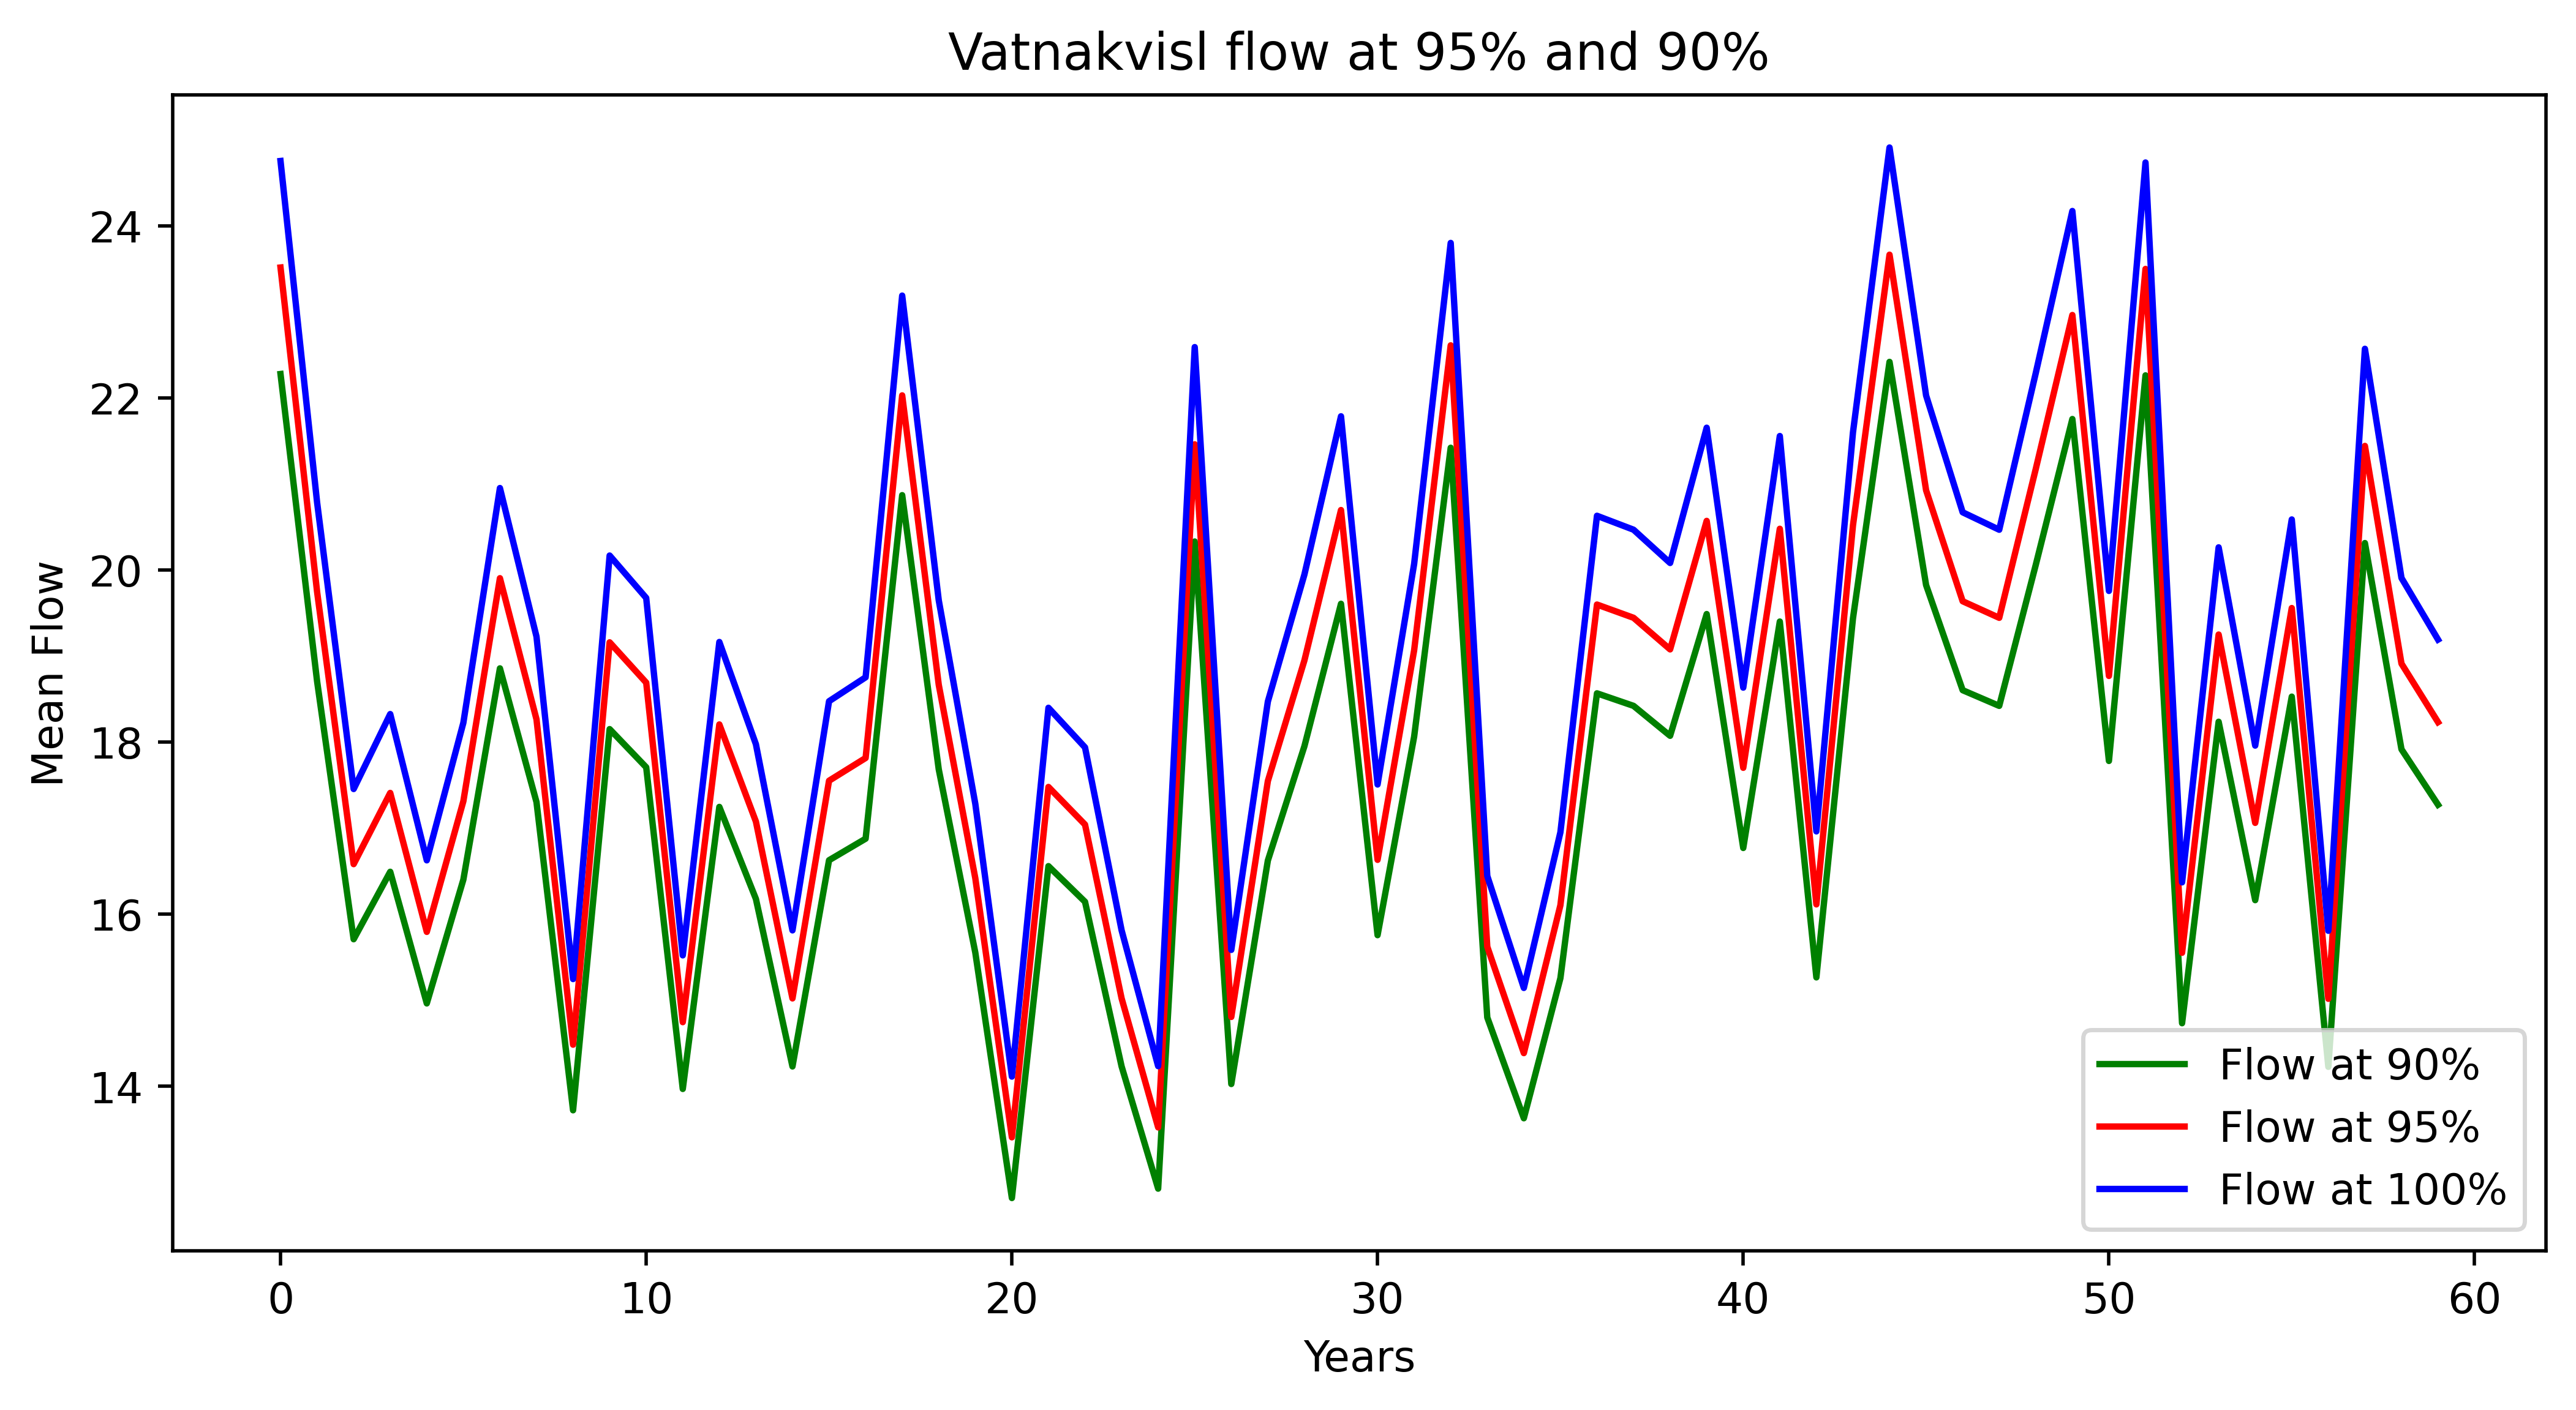

In [15]:
# 90 % and 95% 

Tun_y_9 = Tun_y*0.9
Dyn_y_9 = Dyn_y*0.9
Vat_y_9 = Vat_y*0.9

Tun_y_95 = Tun_y*0.95
Dyn_y_95 = Dyn_y*0.95
Vat_y_95 = Vat_y*0.95

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Tun_y_9, 'g', label= 'Flow at 90%')
ax.plot(Tun_y_95, 'r', label= 'Flow at 95%')
ax.plot(Tun_y, 'b', label= 'Flow at 100%')
ax.set_xlabel('Years')
ax.set_ylabel('Mean Flow')
ax.set_title('Tungnaa flow at 95% and 90%')
ax.legend()
plt.show()

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Dyn_y_9, 'g', label= 'Flow at 90%')
ax.plot(Dyn_y_95, 'r', label= 'Flow at 95%')
ax.plot(Dyn_y, 'b', label= 'Flow at 100%')
ax.set_xlabel('Years')
ax.set_ylabel('Mean Flow')
ax.set_title('Dynkur flow at 95% and 90%')
ax.legend()
plt.show()

fig,ax = plt.subplots(dpi=500, figsize=(10, 5))
ax.plot(Vat_y_9, 'g', label= 'Flow at 90%')
ax.plot(Vat_y_95, 'r', label= 'Flow at 95%')
ax.plot(Vat_y, 'b', label= 'Flow at 100%')
ax.set_xlabel('Years')
ax.set_ylabel('Mean Flow')
ax.set_title('Vatnakvisl flow at 95% and 90%')
ax.legend()
plt.show()



This last section illustrates the effect of 100% versus 95% and 90% production. 